In [1]:
library(dplyr)
library(Seurat)
library(patchwork)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: SeuratObject

Loading required package: sp


Attaching package: ‘SeuratObject’


The following object is masked from ‘package:base’:

    intersect




In [2]:
sessionInfo()

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”


R version 4.3.2 (2023-10-31)
Platform: x86_64-conda-linux-gnu (64-bit)
Running under: Rocky Linux 9.2 (Blue Onyx)

Matrix products: default
BLAS/LAPACK: /tscc/nfs/home/ssharvey/miniconda3/envs/r4-base/lib/libopenblasp-r0.3.25.so;  LAPACK version 3.11.0

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

time zone: America/Los_Angeles
tzcode source: system (glibc)

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
[1] patchwork_1.2.0    Seurat_5.0.1       SeuratObject_5.0.1 sp_2.1-3          
[5] dplyr_1.1.4       

loaded via a namespace (and not attached):
  [1] deldir_2.0-4           pbapply_1.7-2        

In [3]:
data <- readRDS("SoupX_scT_Integrate_cleaned_round1_052724.rds")
data

An object of class Seurat 
57572 features across 181968 samples within 2 assays 
Active assay: SCT (25287 features, 3000 variable features)
 3 layers present: counts, data, scale.data
 1 other assay present: RNA
 3 dimensional reductions calculated: pca, umap, integrated.dr

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



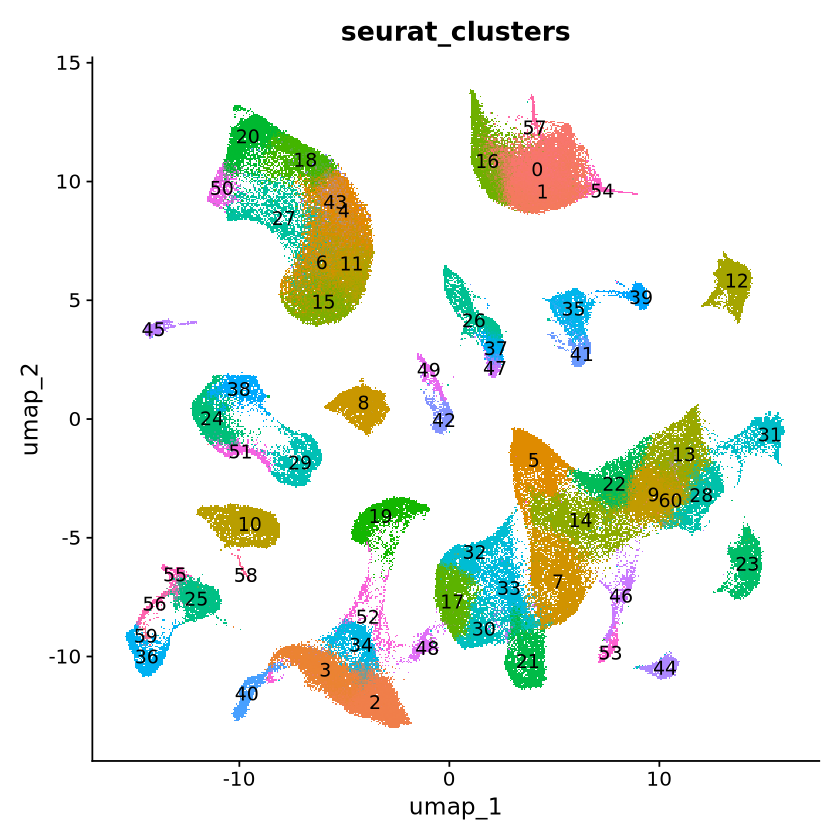

In [4]:
DimPlot(data, reduction = "umap", group.by = c("seurat_clusters"), label = TRUE) + NoLegend()

In [5]:
head(data[[]])

orig.ident    nCount_RNA nFeature_RNA
D1_cKO_LPS_1_AAACCCAAGTCGCGAA-1 SeuratProject 1599       1139        
D1_cKO_LPS_1_AAACCCAGTACAGAAT-1 SeuratProject 5167       2394        
D1_cKO_LPS_1_AAACCCAGTGATAGTA-1 SeuratProject 7121       2714        
D1_cKO_LPS_1_AAACCCAGTGTGAATA-1 SeuratProject 8604       3132        
D1_cKO_LPS_1_AAACCCAGTTCAAGTC-1 SeuratProject 1388        863        
D1_cKO_LPS_1_AAACCCAGTTTATGCG-1 SeuratProject 2798       1495        
                                percent.mt treatment genotype   timepoint
D1_cKO_LPS_1_AAACCCAAGTCGCGAA-1 0.75046904 LPS       Elovl7 cKO D1       
D1_cKO_LPS_1_AAACCCAGTACAGAAT-1 0.69672924 LPS       Elovl7 cKO D1       
D1_cKO_LPS_1_AAACCCAGTGATAGTA-1 0.00000000 LPS       Elovl7 cKO D1       
D1_cKO_LPS_1_AAACCCAGTGTGAATA-1 0.00000000 LPS       Elovl7 cKO D1       
D1_cKO_LPS_1_AAACCCAGTTCAAGTC-1 0.07204611 LPS       Elovl7 cKO D1       
D1_cKO_LPS_1_AAACCCAGTTTATGCG-1 1.25089350 LPS       Elovl7 cKO D1       
                                group      sample       nCount_SCT nFeature_SCT
D1_cKO_LPS_1_AAACCCAAGTCGCGAA-1 D1_cKO_LPS D1_cKO_LPS_1 4020       1565        
D1_cKO_LPS_1_AAACCCAGTACAGAAT-1 D1_cKO_LPS D1_cKO_LPS_1 5251       2393        
D1_cKO_LPS_1_AAACCCAGTGATAGTA-1 D1_cKO_LPS D1_cKO_LPS_1 6068       2714        
D1_cKO_LPS_1_AAACCCAGTGTGAATA-1 D1_cKO_LPS D1_cKO_LPS_1 6215       3115        
D1_cKO_LPS_1_AAACCCAGTTCAAGTC-1 D1_cKO_LPS D1_cKO_LPS_1 4235       1315        
D1_cKO_LPS_1_AAACCCAGTTTATGCG-1 D1_cKO_LPS D1_cKO_LPS_1 4641       1551        
                                SCT_snn_res.2 seurat_clusters
D1_cKO_LPS_1_AAACCCAAGTCGCGAA-1 35            35             
D1_cKO_LPS_1_AAACCCAGTACAGAAT-1 27            27             
D1_cKO_LPS_1_AAACCCAGTGATAGTA-1 2             2              
D1_cKO_LPS_1_AAACCCAGTGTGAATA-1 25            25             
D1_cKO_LPS_1_AAACCCAGTTCAAGTC-1 18            18             
D1_cKO_LPS_1_AAACCCAGTTTATGCG-1 50            50

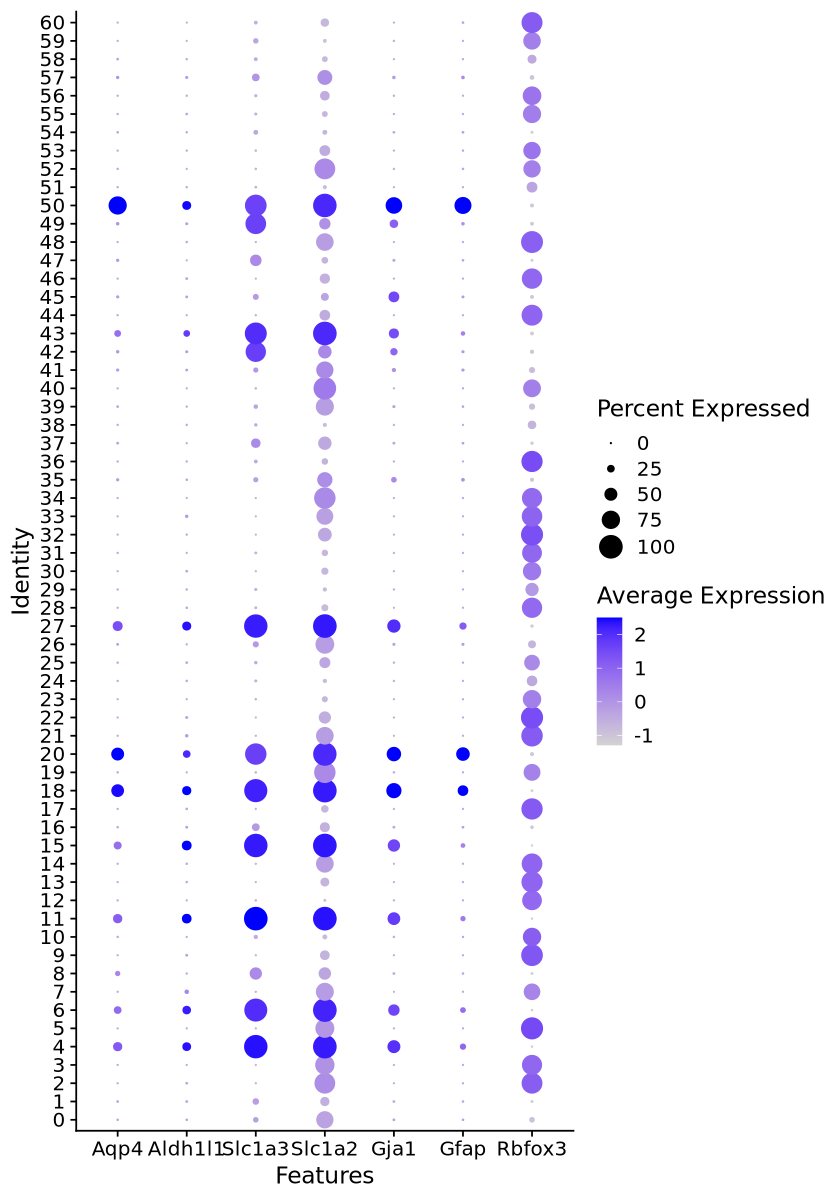

In [6]:
#astrocytes
options(repr.plot.width = 7, repr.plot.height = 10)
DotPlot(data, features = c("Aqp4",
"Aldh1l1",                           
"Slc1a3",
"Slc1a2",
"Gja1",
"Gfap",
"Rbfox3"
))

In [7]:
#astrocytes: 4, 6, 11, 15, 18, 20, 27,43,50

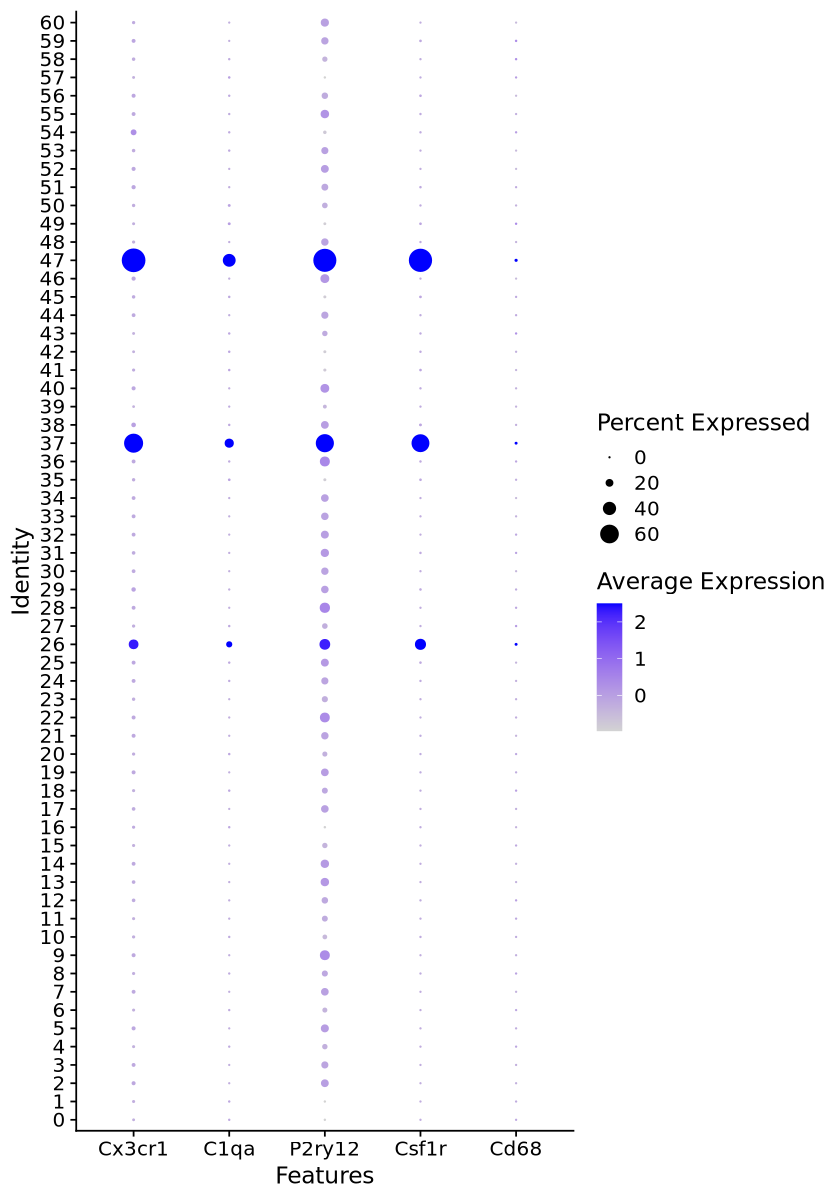

In [8]:
#microglia
options(repr.plot.width = 7, repr.plot.height = 10)
DotPlot(data, features = c("Cx3cr1",
"C1qa",
"P2ry12",
"Csf1r",
"Cd68"
))

In [9]:
#microglia: 26, 37, 47

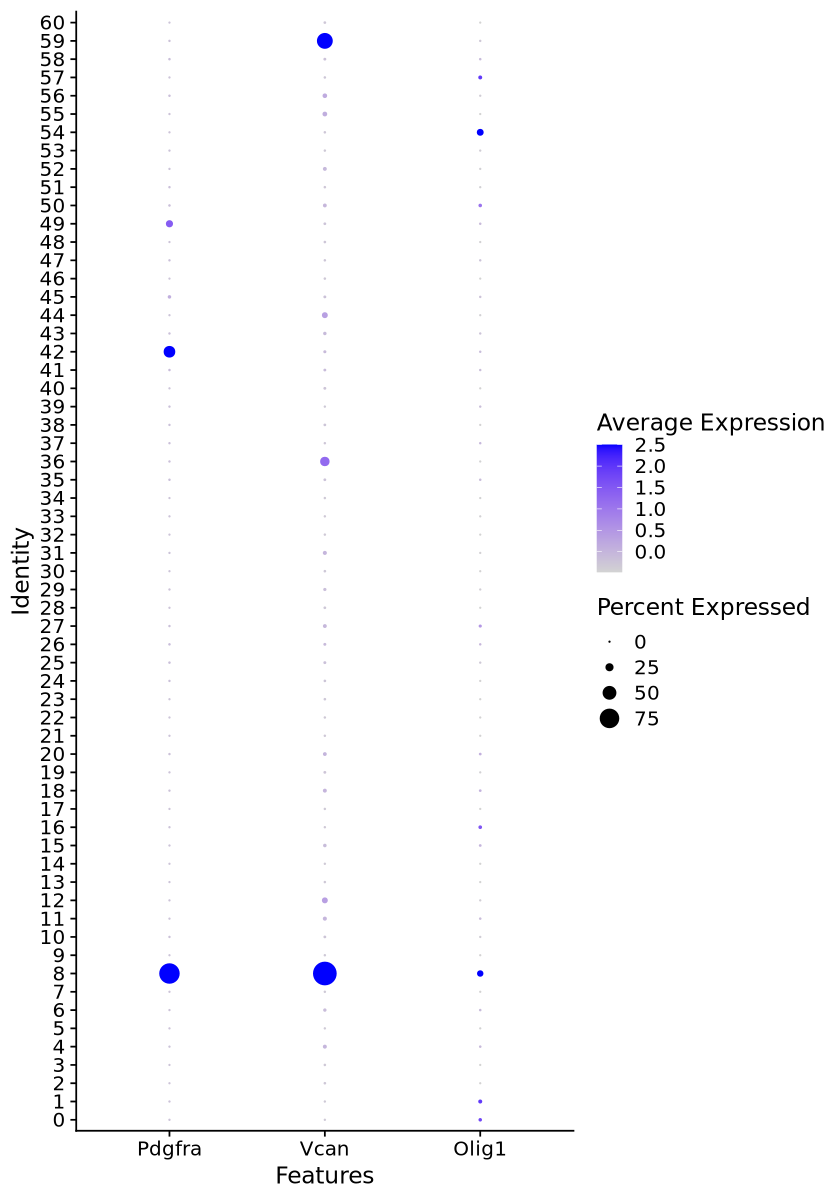

In [10]:
#OPCs
options(repr.plot.width = 7, repr.plot.height = 10)
DotPlot(data, features = c("Pdgfra",
"Vcan",
"Olig1"
))

In [11]:
#OPCs: 8

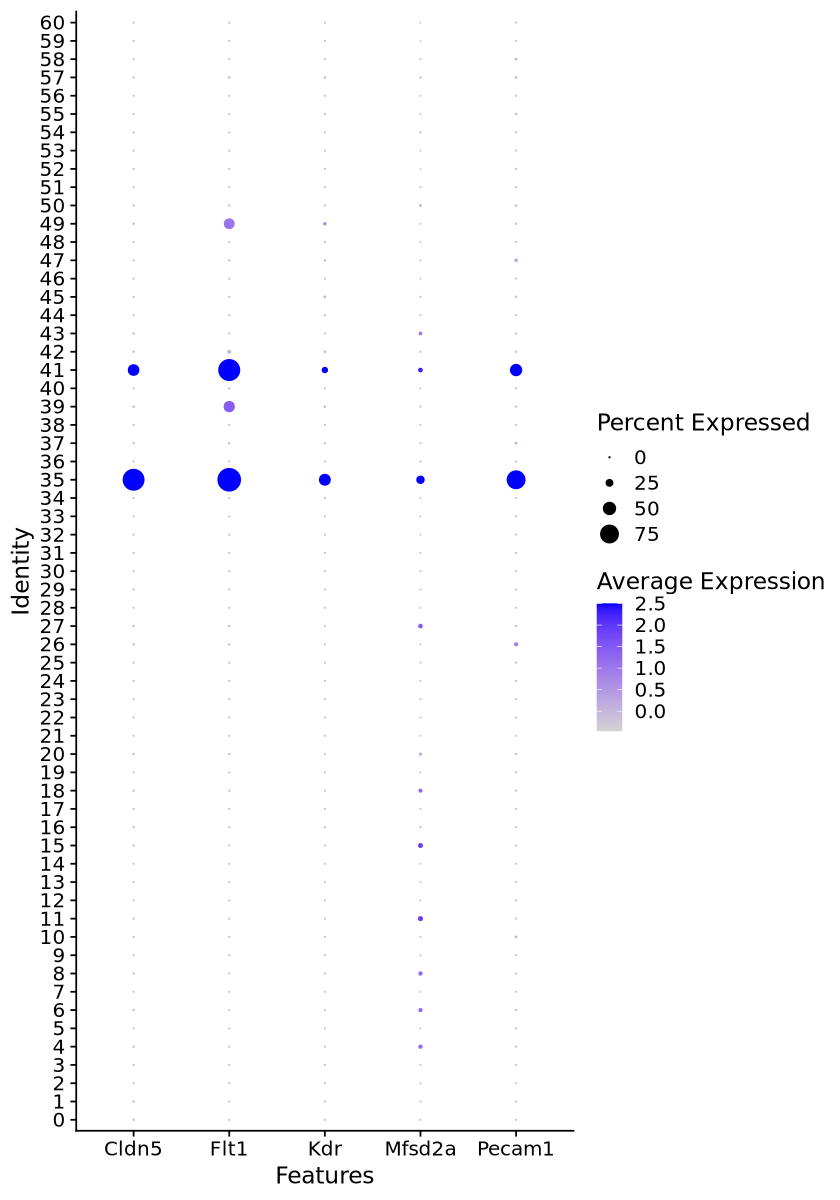

In [12]:
#endothelial cells
options(repr.plot.width = 7, repr.plot.height = 10)
DotPlot(data, features = c("Cldn5",
"Flt1",
"Kdr",
"Mfsd2a",
"Pecam1"
))

In [13]:
#endothelial: 35, 41

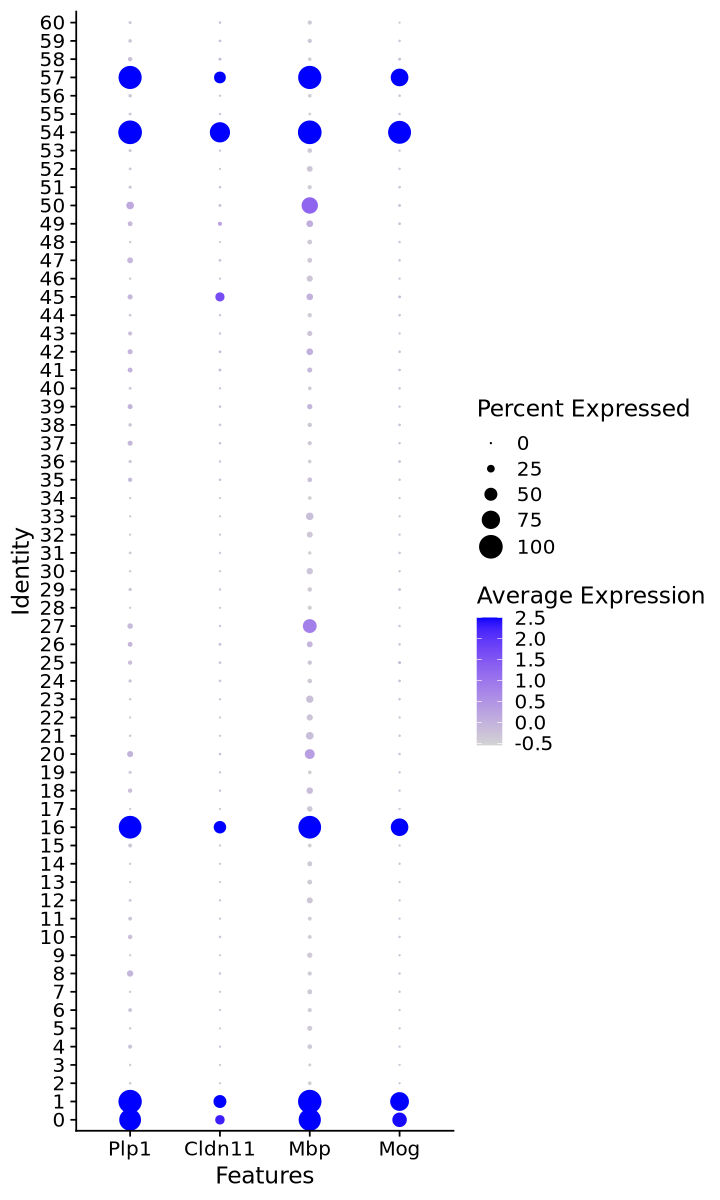

In [14]:
#oligodendrocytes
options(repr.plot.width = 6, repr.plot.height = 10)
DotPlot(data, features = c("Plp1", "Cldn11", "Mbp", "Mog")
)

In [15]:
#oligodendrocytes: 0,1,16,54,57 

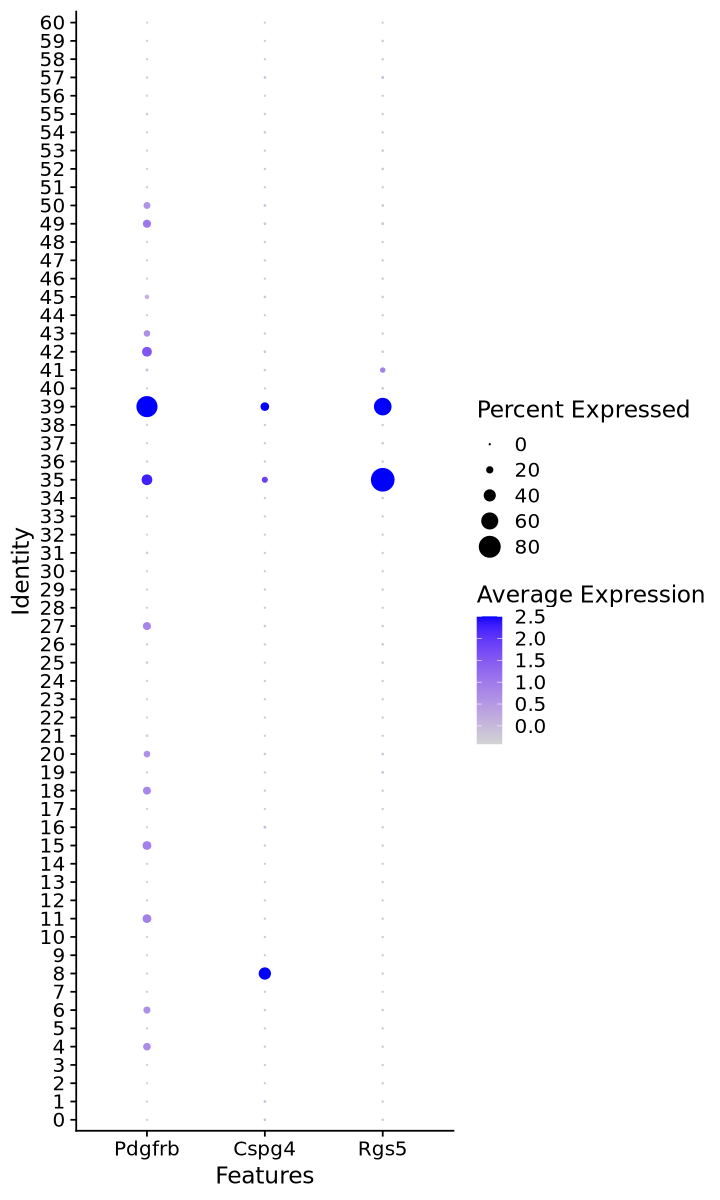

In [16]:
#pericytes and smcs
options(repr.plot.width = 6, repr.plot.height = 10)
DotPlot(data, features = c("Pdgfrb", "Cspg4", "Rgs5")
)

In [17]:
#pericytes: 39

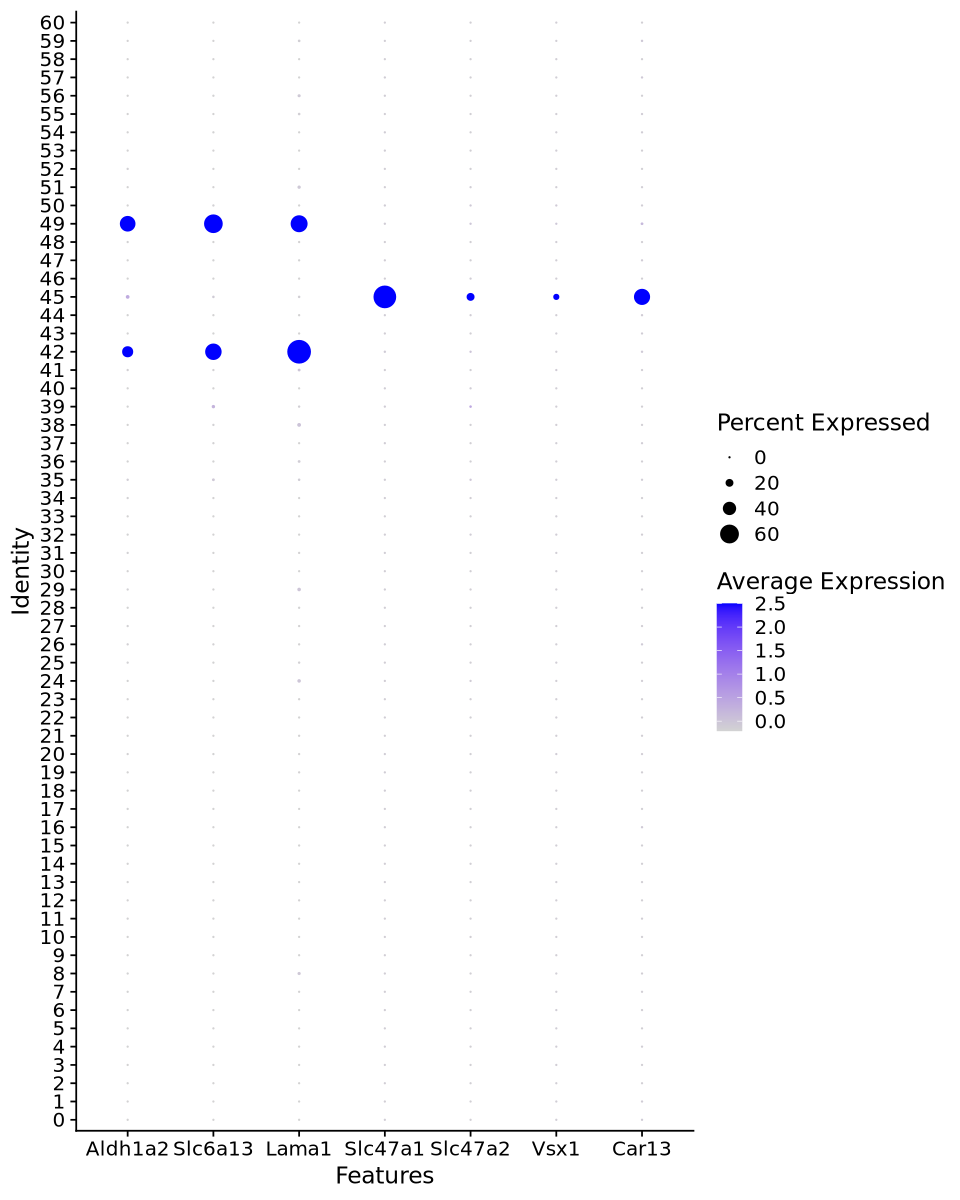

In [18]:
#Fibroblasts
options(repr.plot.width = 8, repr.plot.height = 10)
DotPlot(data, features = c("Aldh1a2", "Slc6a13", "Lama1", "Slc47a1", "Slc47a2", "Vsx1", "Car13")
)

In [19]:
#fibro_1: 42, 49
#fibro_2: 45

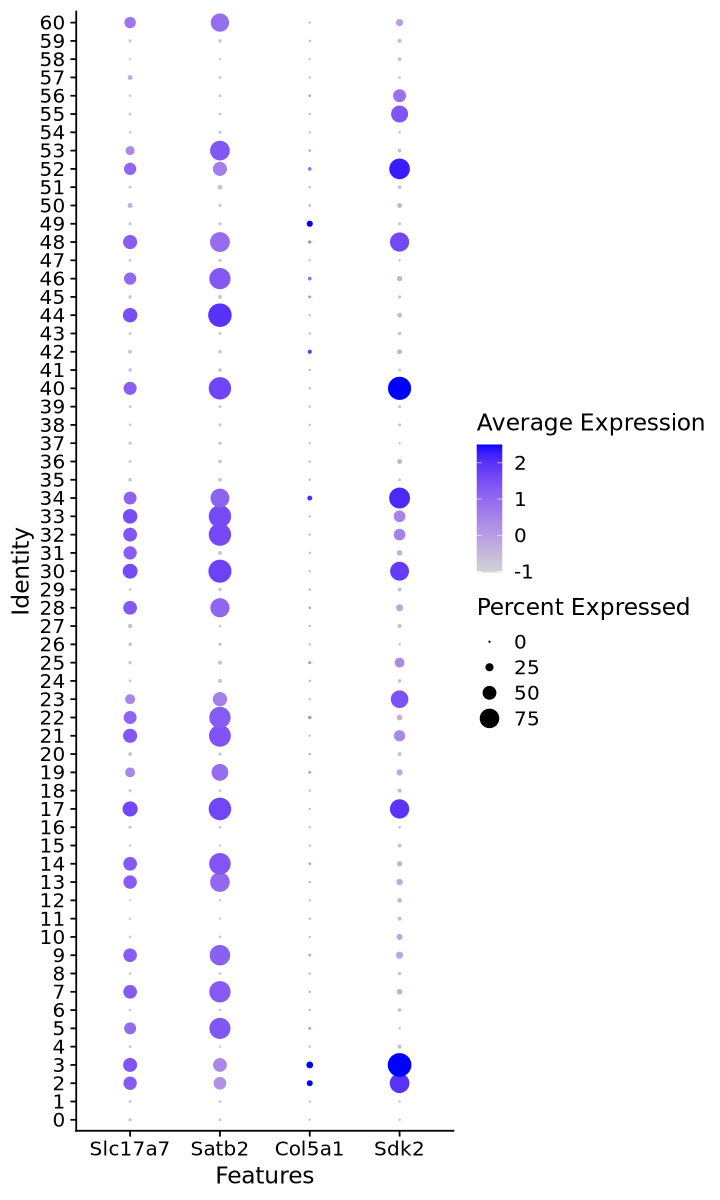

In [20]:
#excitatory neurons
options(repr.plot.width = 6, repr.plot.height = 10)
DotPlot(data, features = c("Slc17a7", "Satb2", "Col5a1", "Sdk2")
)

In [21]:
#excitatory neurons: 2,3,5,7,9,13,14,17,19,21,22,23,28,30,31,32,33,34,40,44,46,48,52,53

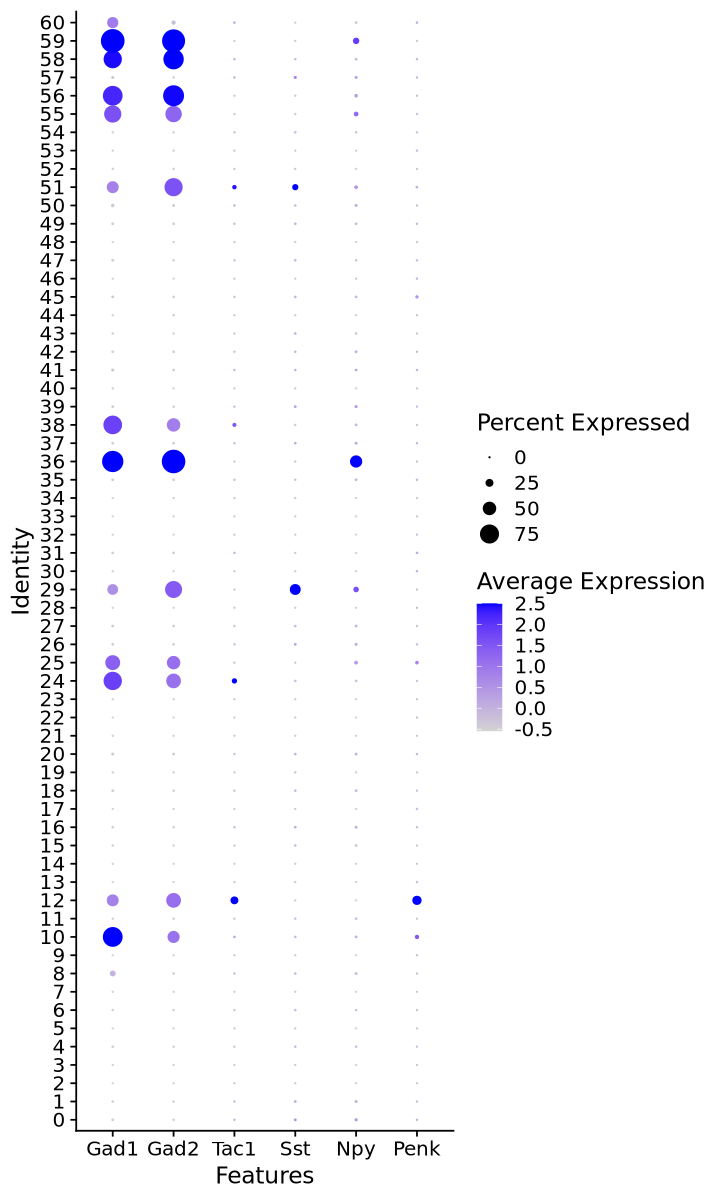

In [22]:
#inhibitory neurons
options(repr.plot.width = 6, repr.plot.height = 10)
DotPlot(data, features = c("Gad1", "Gad2", "Tac1", "Sst", "Npy", "Penk")
)

In [23]:
#astrocytes: 4, 6, 11, 15, 18, 20, 27,43,50

In [24]:
#microglia: 26, 37, 47

In [25]:
#OPCs: 8

In [26]:
#endothelial: 35, 41

In [27]:
#oligodendrocytes: 0,1,16,54,57 

In [28]:
#pericytes: 39

In [29]:
#fibro_1: 42, 49
#fibro_2: 45

In [30]:
#excitatory neurons: 2,3,5,7,9,13,14,17,19,21,22,23,28,30,31,32,33,34,40,44,46,48,52,53

In [31]:
#inhibitory neurons: 10, 12, 24,25,29,36,38,51,59

In [32]:
#add cell annotations - these will be helpful for further subsetting and cleaning
data$celltype <- case_when( data$seurat_clusters == 0 ~ "oligodendrocyte", 
                                  data$seurat_clusters == 1 ~ "oligodendrocyte",
                                  data$seurat_clusters == 2 ~ "ex.neuron",
                                  data$seurat_clusters == 3 ~ "ex.neuron",
                                  data$seurat_clusters == 4 ~ "astrocyte",
                                 data$seurat_clusters == 5 ~ "ex.neuron",
                                 data$seurat_clusters == 6 ~ "astrocyte",
                                 data$seurat_clusters == 7 ~ "ex.neuron",
                                 data$seurat_clusters == 8 ~ "OPC",
                                 data$seurat_clusters == 9 ~ "ex.neuron",
                                 data$seurat_clusters == 10 ~ "in.neuron",
                                 data$seurat_clusters == 11 ~ "astrocyte",
                                 data$seurat_clusters == 12 ~ "in.neuron",
                                 data$seurat_clusters == 13 ~ "ex.neuron",
                                 data$seurat_clusters == 14 ~ "ex.neuron",
                                 data$seurat_clusters == 15 ~ "astrocyte",
                                 data$seurat_clusters == 16 ~ "oligodendrocyte",
                                 data$seurat_clusters == 17 ~ "ex.neuron",
                                 data$seurat_clusters == 18 ~ "astrocyte",
                                 data$seurat_clusters == 19 ~ "ex.neuron",
                                 data$seurat_clusters == 20 ~ "astrocyte",
                                 data$seurat_clusters == 21 ~ "ex.neuron",
                                 data$seurat_clusters == 22 ~ "ex.neuron",
                                 data$seurat_clusters == 23 ~ "ex.neuron",
                                 data$seurat_clusters == 24 ~ "in.neuron",
                                 data$seurat_clusters == 25 ~ "in.neuron",
                                 data$seurat_clusters == 26 ~ "microglia",
                                 data$seurat_clusters == 27 ~ "astrocyte",
                                 data$seurat_clusters == 28 ~ "ex.neuron",
                                 data$seurat_clusters == 29 ~ "in.neuron",
                                 data$seurat_clusters == 30 ~ "ex.neuron",
                                 data$seurat_clusters == 31 ~ "ex.neuron",
                                 data$seurat_clusters == 32 ~ "ex.neuron",
                                 data$seurat_clusters == 33 ~ "ex.neuron",
                                 data$seurat_clusters == 34 ~ "ex.neuron",
                                 data$seurat_clusters == 35 ~ "endothelial",
                                 data$seurat_clusters == 36 ~ "in.neuron",
                                 data$seurat_clusters == 37 ~ "microglia",
                                 data$seurat_clusters == 38 ~ "in.neuron",
                                 data$seurat_clusters == 39 ~ "pericyte",
                                 data$seurat_clusters == 40 ~ "ex.neuron",
                                 data$seurat_clusters == 41 ~ "endothelial",
                                 data$seurat_clusters == 42 ~ "fibro.1",
                                 data$seurat_clusters == 43 ~ "astrocyte",
                                 data$seurat_clusters == 44 ~ "ex.neuron",
                                 data$seurat_clusters == 45 ~ "fibro.2",
                                 data$seurat_clusters == 46 ~ "doublet",
                                 data$seurat_clusters == 47 ~ "microglia",
                                 data$seurat_clusters == 48 ~ "doublet",
                                 data$seurat_clusters == 49 ~ "fibro.1",
                                 data$seurat_clusters == 50 ~ "astrocyte",
                                 data$seurat_clusters == 51 ~ "in.neuron",
                                 data$seurat_clusters == 52 ~ "doublet",
                                 data$seurat_clusters == 53 ~ "doublet",
                           data$seurat_clusters == 54 ~ "oligodendrocyte",
                           data$seurat_clusters == 55 ~ "doublet",
                           data$seurat_clusters == 56 ~ "doublet",
                           data$seurat_clusters == 57 ~ "oligodendrocyte",
                           data$seurat_clusters == 58 ~ "doublet",
                           data$seurat_clusters == 59 ~ "in.neuron",
                           data$seurat_clusters == 60 ~ "doublet"
                                 )

In [33]:
Idents(data) <- "celltype"

In [34]:
data_clean <- subset(data, idents = c("doublet"), invert = TRUE)
data_clean
head(data_clean[[]])

An object of class Seurat 
57572 features across 176741 samples within 2 assays 
Active assay: SCT (25287 features, 3000 variable features)
 3 layers present: counts, data, scale.data
 1 other assay present: RNA
 3 dimensional reductions calculated: pca, umap, integrated.dr

orig.ident    nCount_RNA nFeature_RNA
D1_cKO_LPS_1_AAACCCAAGTCGCGAA-1 SeuratProject 1599       1139        
D1_cKO_LPS_1_AAACCCAGTACAGAAT-1 SeuratProject 5167       2394        
D1_cKO_LPS_1_AAACCCAGTGATAGTA-1 SeuratProject 7121       2714        
D1_cKO_LPS_1_AAACCCAGTGTGAATA-1 SeuratProject 8604       3132        
D1_cKO_LPS_1_AAACCCAGTTCAAGTC-1 SeuratProject 1388        863        
D1_cKO_LPS_1_AAACCCAGTTTATGCG-1 SeuratProject 2798       1495        
                                percent.mt treatment genotype   timepoint
D1_cKO_LPS_1_AAACCCAAGTCGCGAA-1 0.75046904 LPS       Elovl7 cKO D1       
D1_cKO_LPS_1_AAACCCAGTACAGAAT-1 0.69672924 LPS       Elovl7 cKO D1       
D1_cKO_LPS_1_AAACCCAGTGATAGTA-1 0.00000000 LPS       Elovl7 cKO D1       
D1_cKO_LPS_1_AAACCCAGTGTGAATA-1 0.00000000 LPS       Elovl7 cKO D1       
D1_cKO_LPS_1_AAACCCAGTTCAAGTC-1 0.07204611 LPS       Elovl7 cKO D1       
D1_cKO_LPS_1_AAACCCAGTTTATGCG-1 1.25089350 LPS       Elovl7 cKO D1       
                                group      sample       nCount_SCT nFeature_SCT
D1_cKO_LPS_1_AAACCCAAGTCGCGAA-1 D1_cKO_LPS D1_cKO_LPS_1 4020       1565        
D1_cKO_LPS_1_AAACCCAGTACAGAAT-1 D1_cKO_LPS D1_cKO_LPS_1 5251       2393        
D1_cKO_LPS_1_AAACCCAGTGATAGTA-1 D1_cKO_LPS D1_cKO_LPS_1 6068       2714        
D1_cKO_LPS_1_AAACCCAGTGTGAATA-1 D1_cKO_LPS D1_cKO_LPS_1 6215       3115        
D1_cKO_LPS_1_AAACCCAGTTCAAGTC-1 D1_cKO_LPS D1_cKO_LPS_1 4235       1315        
D1_cKO_LPS_1_AAACCCAGTTTATGCG-1 D1_cKO_LPS D1_cKO_LPS_1 4641       1551        
                                SCT_snn_res.2 seurat_clusters celltype   
D1_cKO_LPS_1_AAACCCAAGTCGCGAA-1 35            35              endothelial
D1_cKO_LPS_1_AAACCCAGTACAGAAT-1 27            27              astrocyte  
D1_cKO_LPS_1_AAACCCAGTGATAGTA-1 2             2               ex.neuron  
D1_cKO_LPS_1_AAACCCAGTGTGAATA-1 25            25              in.neuron  
D1_cKO_LPS_1_AAACCCAGTTCAAGTC-1 18            18              astrocyte  
D1_cKO_LPS_1_AAACCCAGTTTATGCG-1 50            50              astrocyte

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



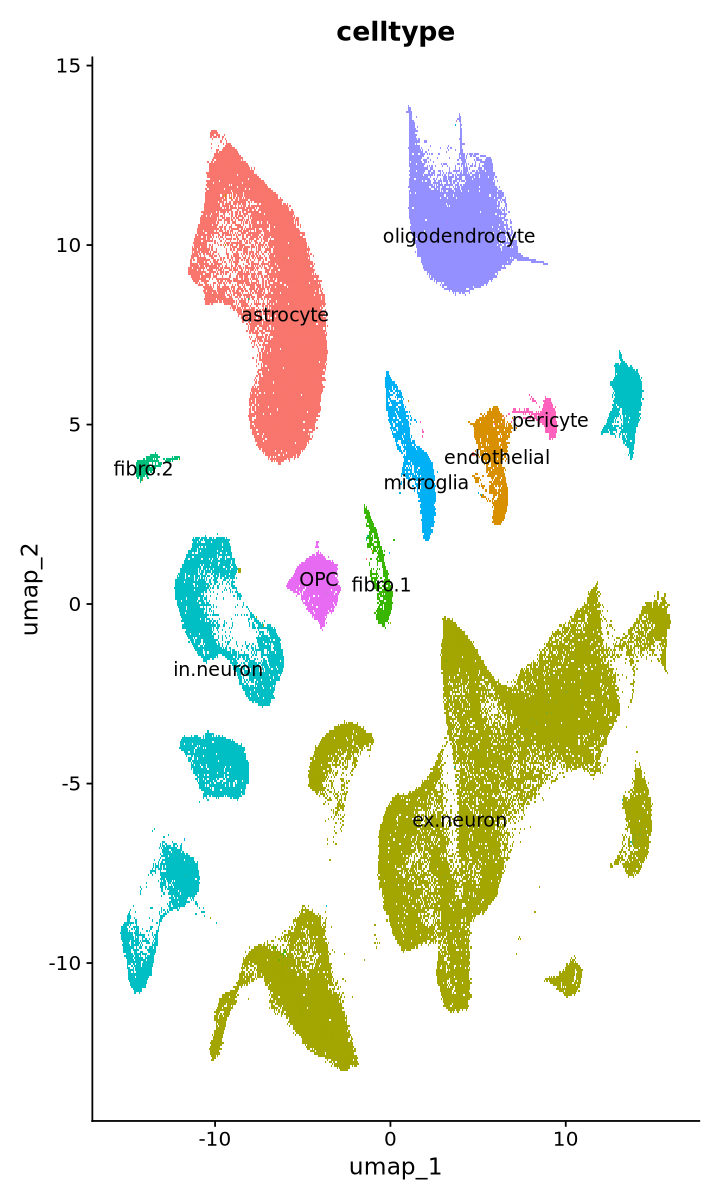

In [35]:
DimPlot(data_clean, reduction = "umap", group.by = c("celltype"), label = TRUE) + NoLegend()

In [36]:
#remove doublets that contain contamination from other cell-type specific markers
#begin by cleaning endothelial clusters
data_clean <- subset(data_clean, idents = "endothelial", subset =  Mog > 0 | Pdgfrb > 0 | Gfap > 0 | Aldh1l1 > 0 | Aqp4 > 0 | Rbfox3 > 0 | Csf1r > 0, invert = TRUE)
data_clean

An object of class Seurat 
57572 features across 175294 samples within 2 assays 
Active assay: SCT (25287 features, 3000 variable features)
 3 layers present: counts, data, scale.data
 1 other assay present: RNA
 3 dimensional reductions calculated: pca, umap, integrated.dr

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



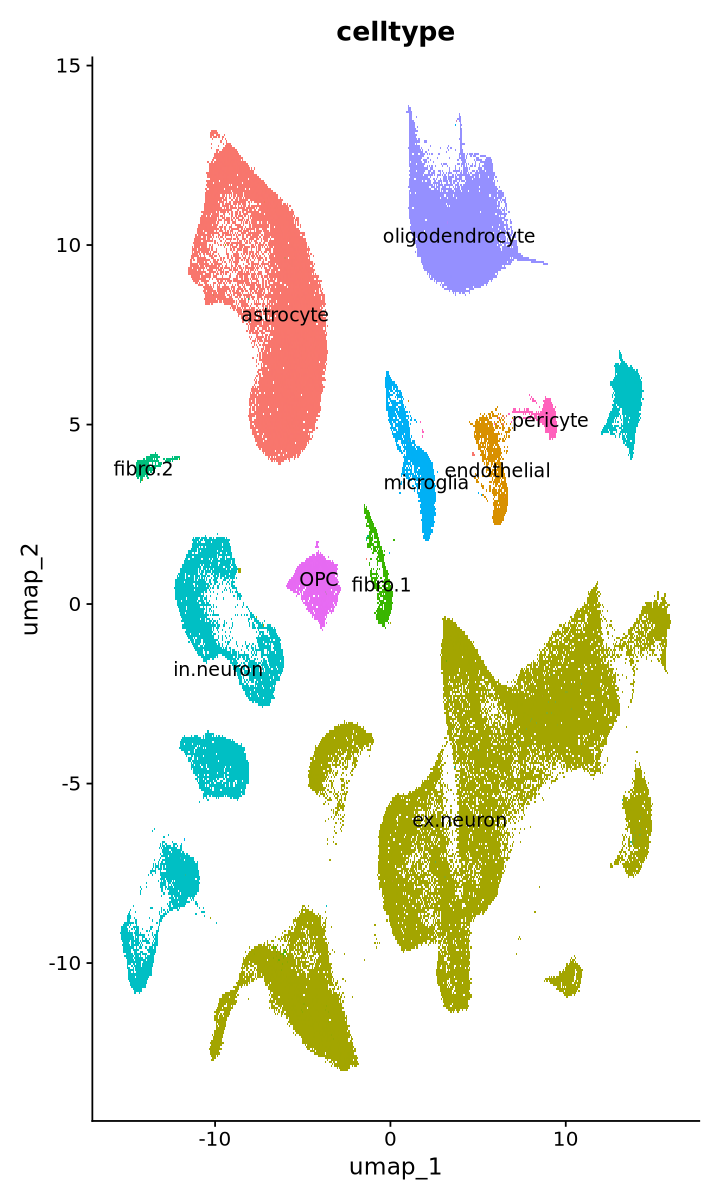

In [37]:
DimPlot(data_clean, reduction = "umap", group.by = c("celltype"), label = TRUE) + NoLegend()

In [38]:
#remove doublets that contain contamination from other cell-type specific markers
#begin by cleaning pericyte clusters
data_clean <- subset(data_clean, idents = "pericyte", subset =  Mbp > 0 | Mog > 0 | Cldn5 > 0 | Gfap > 0 | Aldh1l1 > 0 | Aqp4 > 0 | Rbfox3 > 0 | Csf1r > 0, invert = TRUE)
data_clean

An object of class Seurat 
57572 features across 174680 samples within 2 assays 
Active assay: SCT (25287 features, 3000 variable features)
 3 layers present: counts, data, scale.data
 1 other assay present: RNA
 3 dimensional reductions calculated: pca, umap, integrated.dr

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



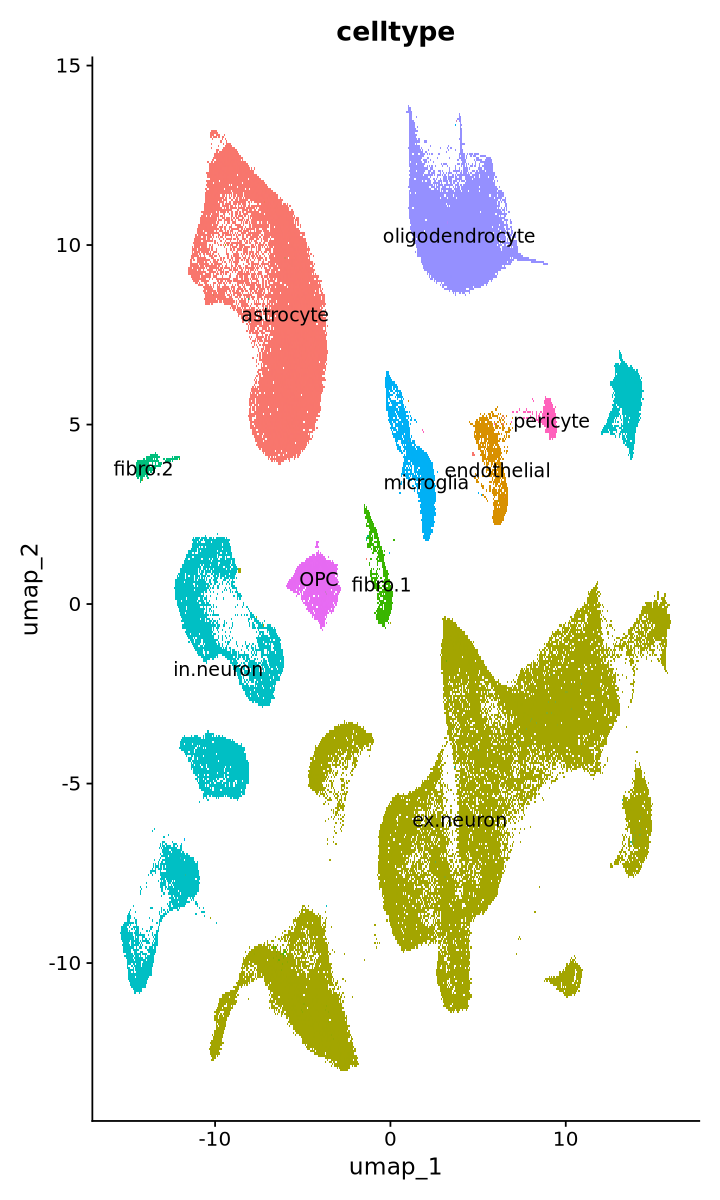

In [39]:
DimPlot(data_clean, reduction = "umap", group.by = c("celltype"), label = TRUE) + NoLegend()

In [40]:
#remove doublets that contain contamination from other cell-type specific markers
#microglia clusters
data_clean <- subset(data_clean, idents = "microglia", subset =  Mbp > 0 | Mog > 0 | Cldn5 > 0 | Gfap > 0 | Aldh1l1 > 0 | Aqp4 > 0 | Rbfox3 > 0 | Pdgfrb > 0, invert = TRUE)
data_clean

An object of class Seurat 
57572 features across 172836 samples within 2 assays 
Active assay: SCT (25287 features, 3000 variable features)
 3 layers present: counts, data, scale.data
 1 other assay present: RNA
 3 dimensional reductions calculated: pca, umap, integrated.dr

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



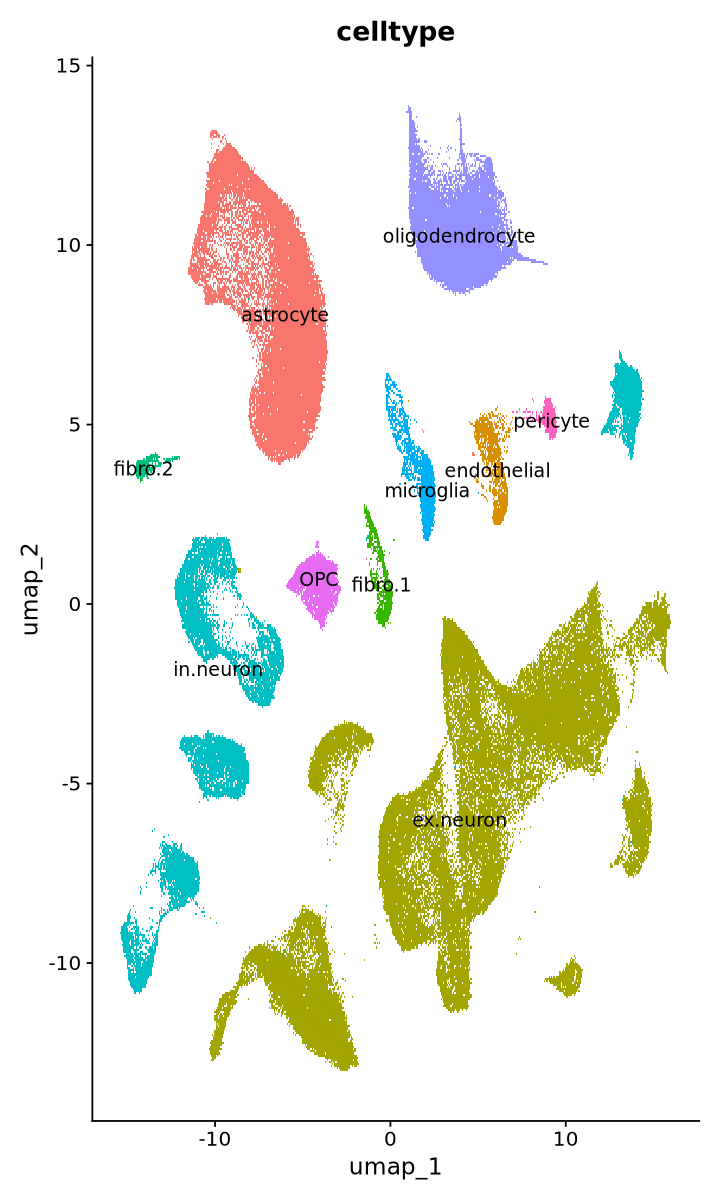

In [41]:
DimPlot(data_clean, reduction = "umap", group.by = c("celltype"), label = TRUE) + NoLegend()

In [42]:
#remove doublets that contain contamination from other cell-type specific markers
#oligodendrocyte clusters
data_clean <- subset(data_clean, idents = "oligodendrocyte", subset =  Csf1r > 0 | Cldn5 > 0 | Gfap > 0 | Aldh1l1 > 0 | Aqp4 > 0 | Rbfox3 > 0 | Pdgfrb > 0, invert = TRUE)
data_clean

An object of class Seurat 
57572 features across 169391 samples within 2 assays 
Active assay: SCT (25287 features, 3000 variable features)
 3 layers present: counts, data, scale.data
 1 other assay present: RNA
 3 dimensional reductions calculated: pca, umap, integrated.dr

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



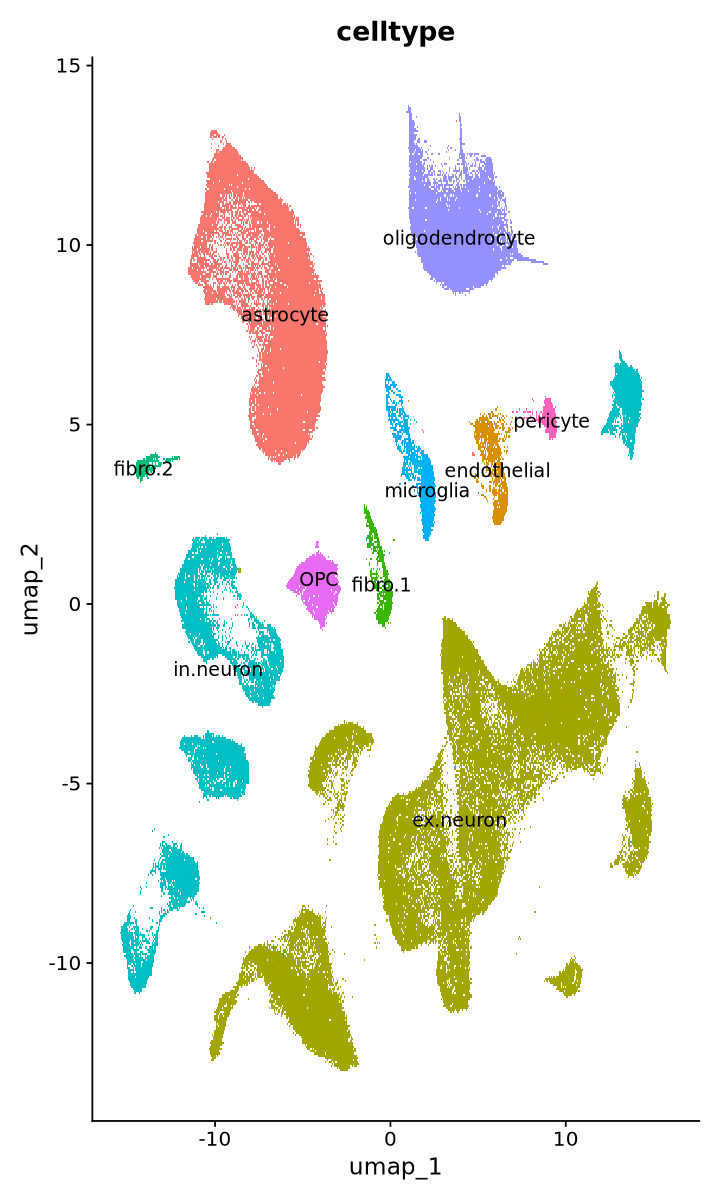

In [43]:
DimPlot(data_clean, reduction = "umap", group.by = c("celltype"), label = TRUE) + NoLegend()

In [44]:
#remove doublets that contain contamination from other cell-type specific markers
#astrocyte clusters
data_clean <- subset(data_clean, idents = "astrocyte", subset =  Csf1r > 0 | Cldn5 > 0 | Mog > 0 | Rbfox3 > 0 | Pdgfrb > 0, invert = TRUE)
data_clean

An object of class Seurat 
57572 features across 160407 samples within 2 assays 
Active assay: SCT (25287 features, 3000 variable features)
 3 layers present: counts, data, scale.data
 1 other assay present: RNA
 3 dimensional reductions calculated: pca, umap, integrated.dr

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



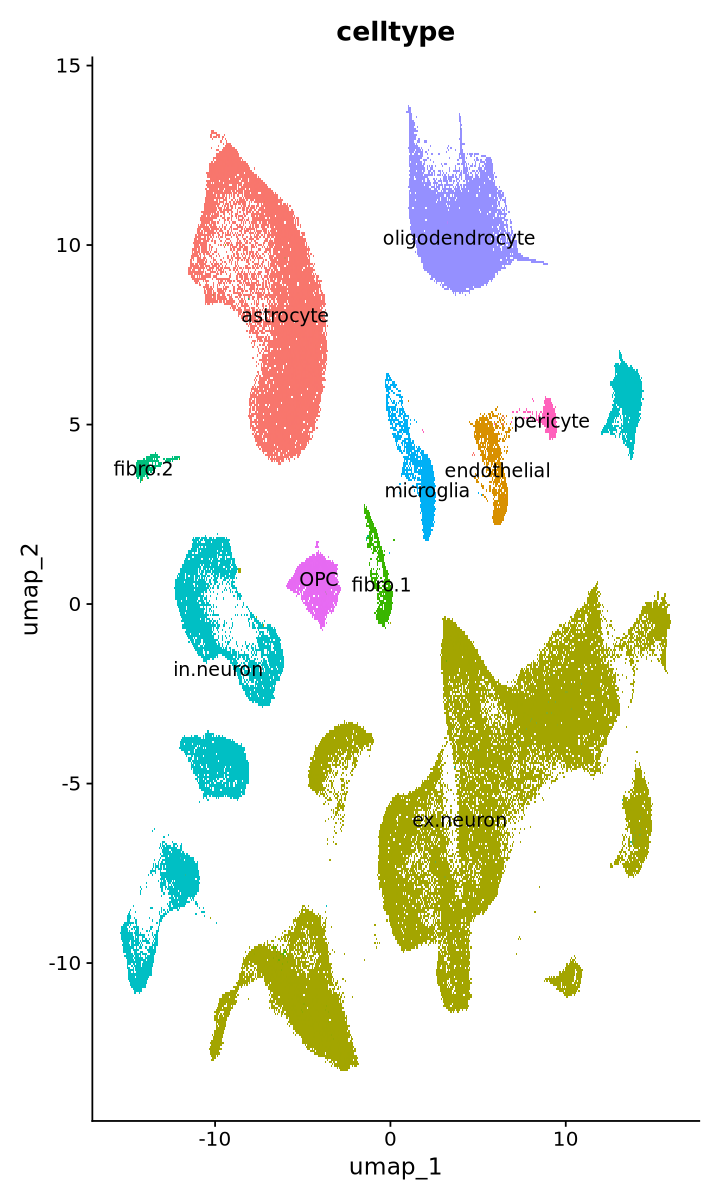

In [45]:
DimPlot(data_clean, reduction = "umap", group.by = c("celltype"), label = TRUE) + NoLegend()

In [46]:
#remove doublets that contain contamination from other cell-type specific markers
#ex.neuron clusters
data_clean <- subset(data_clean, idents = "ex.neuron", subset =  Csf1r > 0 | Cldn5 > 0 | Mbp > 0 | Mog > 0 | Gad1 > 0 | Pdgfrb > 0 | Aqp4 > 0 | Aldh1l1 > 0 | Gfap > 0, invert = TRUE)
data_clean

An object of class Seurat 
57572 features across 148440 samples within 2 assays 
Active assay: SCT (25287 features, 3000 variable features)
 3 layers present: counts, data, scale.data
 1 other assay present: RNA
 3 dimensional reductions calculated: pca, umap, integrated.dr

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



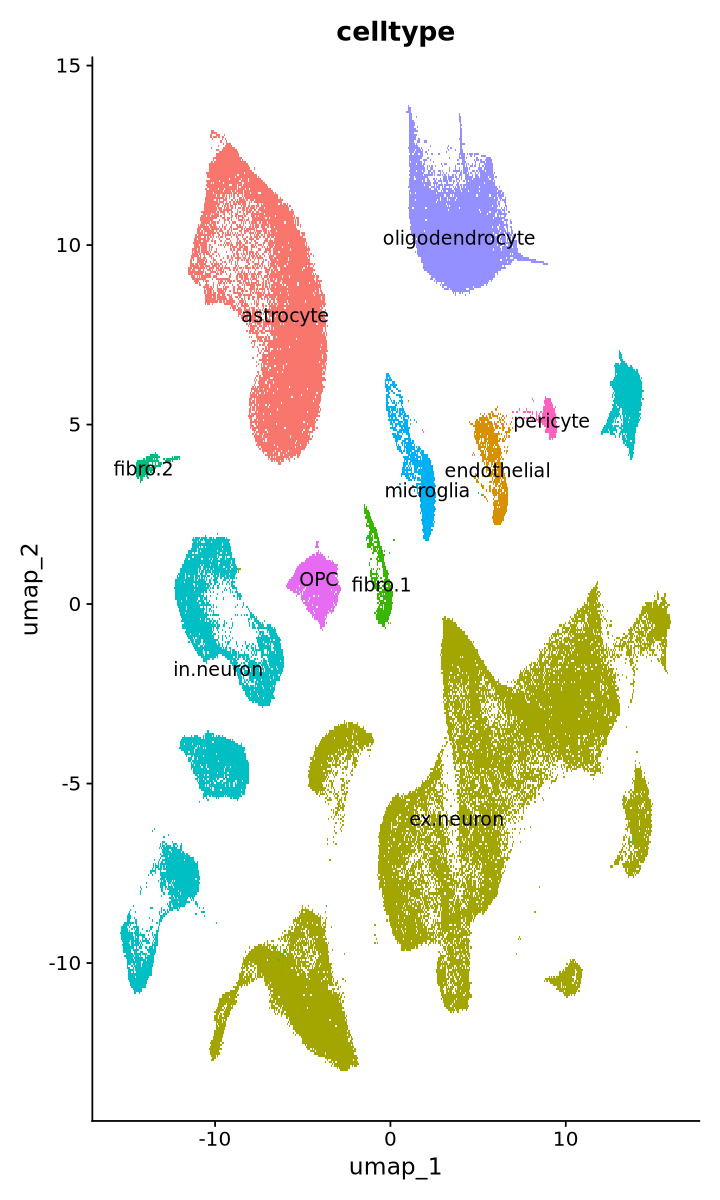

In [47]:
DimPlot(data_clean, reduction = "umap", group.by = c("celltype"), label = TRUE) + NoLegend()

In [48]:
#remove doublets that contain contamination from other cell-type specific markers
#ex.neuron clusters
data_clean <- subset(data_clean, idents = "in.neuron", subset =  Csf1r > 0 | Cldn5 > 0 | Mbp > 0 | Mog > 0 | Satb2 > 0 | Pdgfrb > 0 | Aqp4 > 0 | Aldh1l1 > 0 | Gfap > 0, invert = TRUE)
data_clean

An object of class Seurat 
57572 features across 144255 samples within 2 assays 
Active assay: SCT (25287 features, 3000 variable features)
 3 layers present: counts, data, scale.data
 1 other assay present: RNA
 3 dimensional reductions calculated: pca, umap, integrated.dr

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



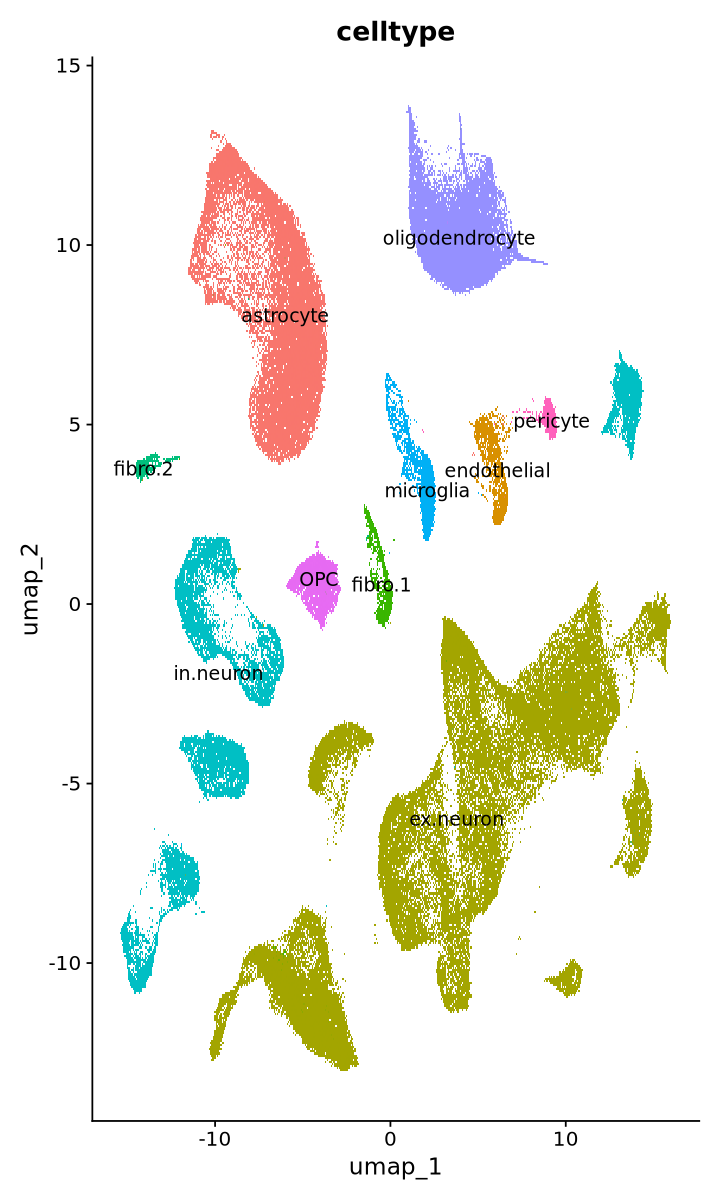

In [49]:
DimPlot(data_clean, reduction = "umap", group.by = c("celltype"), label = TRUE) + NoLegend()

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



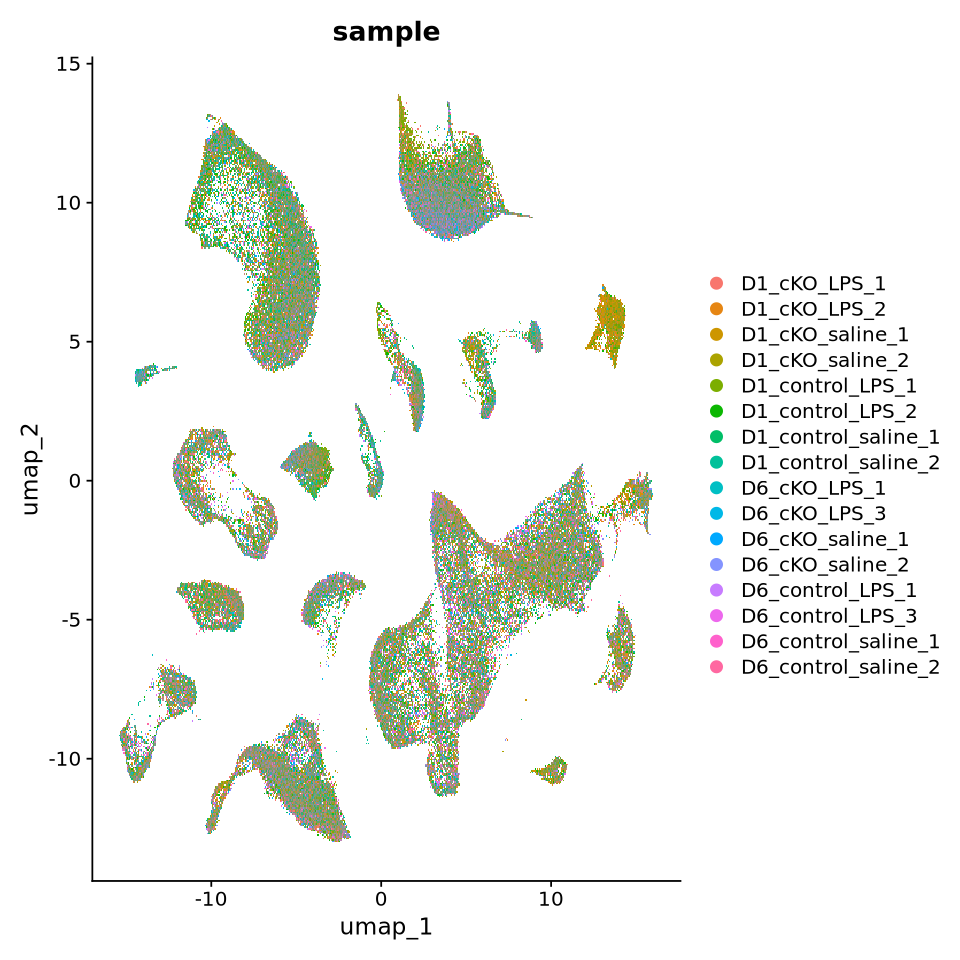

In [50]:
options(repr.plot.width = 8, repr.plot.height = 8)
DimPlot(data_clean, reduction = "umap", group.by = c("sample"), label = FALSE)

In [51]:
#re-cluster cleaned dataset - after this point, we can process for final cell-type annotations
data_clean <- RunPCA(data_clean)
data_clean <- FindNeighbors(data_clean, reduction = "integrated.dr", dims = 1:30)
data_clean <- FindClusters(data_clean, resolution = 2)
data_clean <- RunUMAP(data_clean, dims = 1:30)

PC_ 1 
Positive:  Dpp10, Kcnip4, Erbb4, Galntl6, Rbfox1, Nrg3, Ptprd, Lingo2, Adarb2, Meg3 
	   Nrxn3, Lrrtm4, Hs3st4, Cntnap2, Nrg1, Csmd1, Snhg11, Dlg2, Syt1, Kcnq5 
	   Tafa1, Cntn5, Tenm2, Sgcz, Nxph1, Cdh18, Hs6st3, Il1rapl2, Etl4, Opcml 
Negative:  Gpc5, Slc1a2, Slc1a3, Luzp2, Prex2, Trpm3, Zbtb20, Mertk, Ptprz1, Gm20713 
	   Npas3, Wdr17, Atp1a2, Plpp3, Nhsl1, Msi2, Slco1c1, Rorb, Qk, Maml2 
	   Gli3, Glis3, Lama2, Cdh19, Slc4a4, Nfia, Apoe, Rmst, Glul, Slc7a11 
PC_ 2 
Positive:  St18, Plp1, Prr5l, Mbp, Plcl1, Dock10, Mobp, Pde4b, D7Ertd443e, Zfp536 
	   Rnf220, St6galnac3, Mog, Aspa, Edil3, Tmeff2, Apod, Slc24a2, Ugt8a, Neat1 
	   Ptgds, Sec14l5, Nkain2, Adipor2, Trf, Frmd5, Tspan2, Map7, Pde8a, Ppp1r16b 
Negative:  Gpc5, Slc1a2, Luzp2, Lsamp, Slc1a3, Wdr17, Prex2, Dpp10, Gm20713, Kcnip4 
	   Ptprz1, Trpm3, Mertk, Rorb, Ntm, Galntl6, Nrxn1, Npas3, Slc4a4, Rmst 
	   Nhsl1, Rbfox1, Gabrb1, Rora, Msi2, Nrxn3, Nrg3, Rgs20, Atp1a2, Lrrtm4 
PC_ 3 
Positive:  Dpp10, Hs3st4, Ptprd, Nrg

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 144255
Number of edges: 6088100

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9078
Number of communities: 53
Elapsed time: 55 seconds


Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”
13:44:50 UMAP embedding parameters a = 0.9922 b = 1.112

13:44:50 Read 144255 rows and found 30 numeric columns

13:44:50 Using Annoy for neighbor search, n_neighbors = 30

13:44:50 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

13:45:06 Writing NN index file to temp file /tmp/Rtmppr03xF/file17f88e65557b43

13:45:06 Searching Annoy index using 1 thread, search_k = 3000

13:46:06 Annoy recall = 100%

13:46:07 Commencing smooth kNN distance calibration using 1 thread
 with target n_neighbo

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



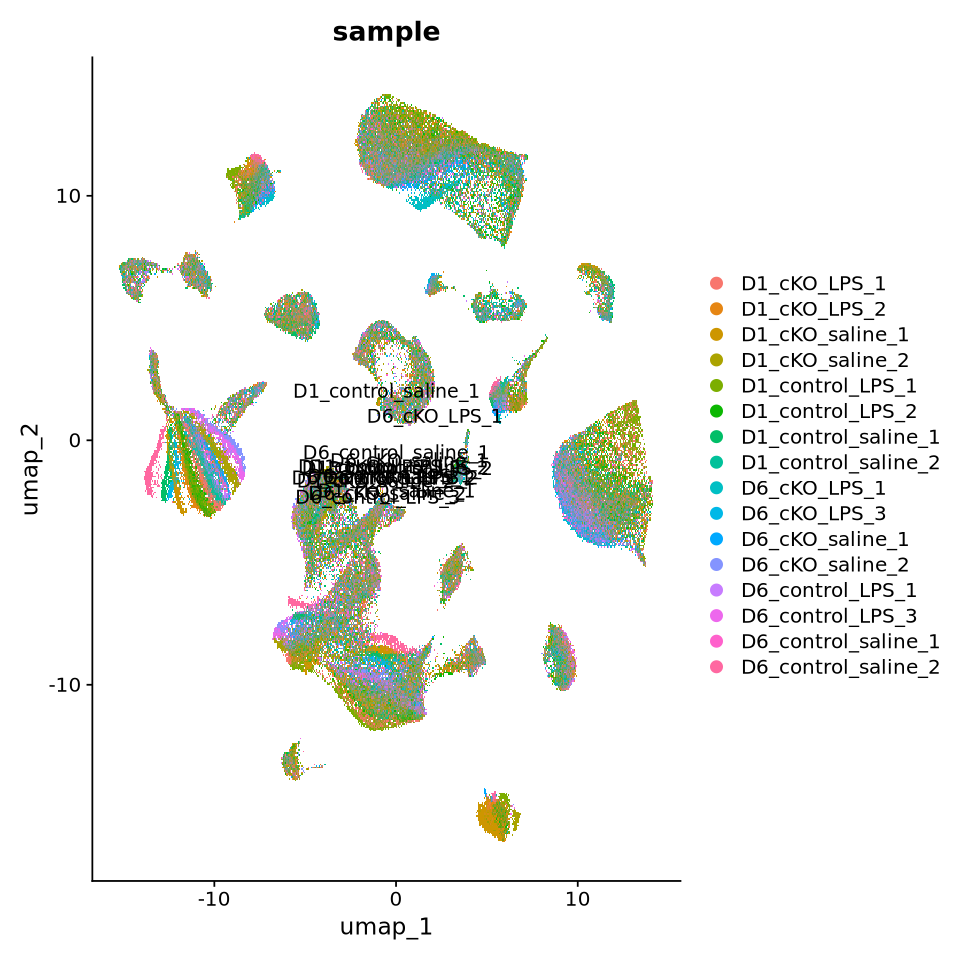

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



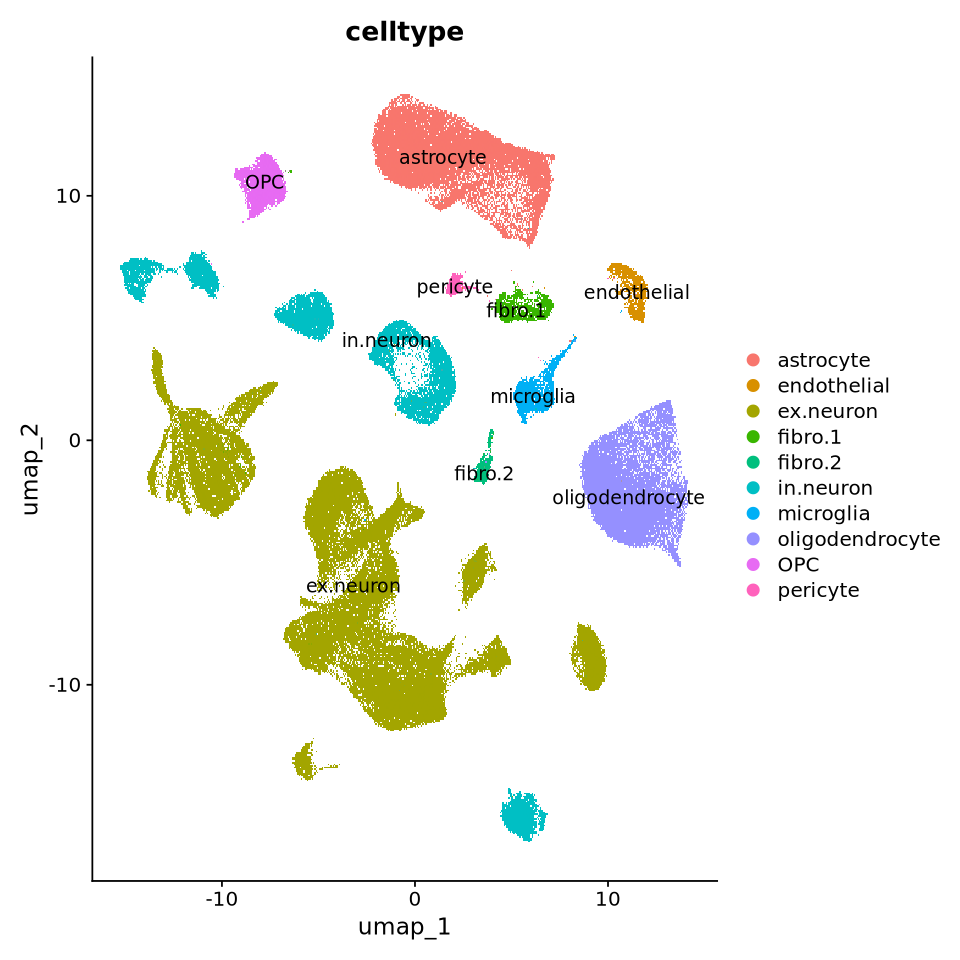

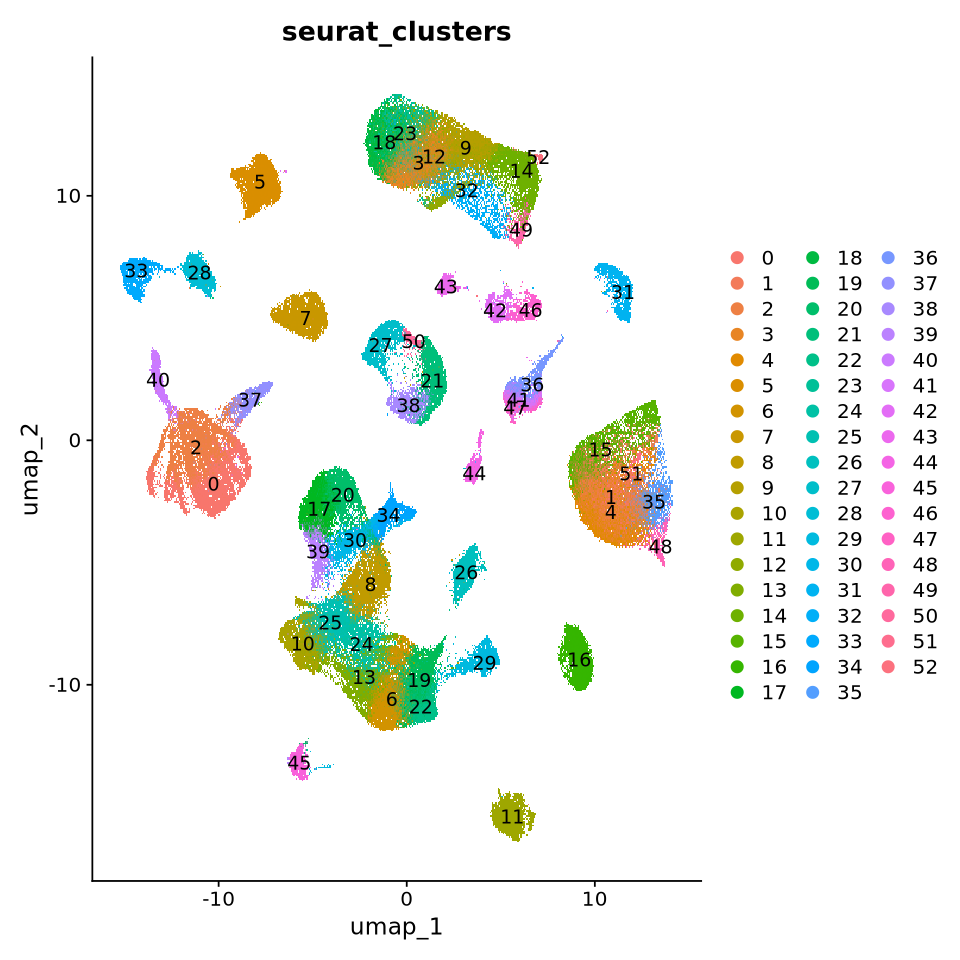

In [52]:
DimPlot(data_clean, reduction = "umap", group.by = c("sample"), label = TRUE)
DimPlot(data_clean, reduction = "umap", group.by = c("celltype"), label = TRUE)
DimPlot(data_clean, reduction = "umap", group.by = c("seurat_clusters"), label = TRUE)

In [53]:
#expand memory to allow for large dataset integration
options(future.globals.maxSize = 1e+12)

In [54]:
# integrate datasets w/ default settings
data_final <- IntegrateLayers(object = data_clean, method = RPCAIntegration, normalization.method = "SCT", verbose = T)

Computing within dataset neighborhoods

Finding all pairwise anchors

Projecting new data onto SVD

Projecting new data onto SVD

Finding neighborhoods

Finding anchors

	Found 10150 anchors

Projecting new data onto SVD

Projecting new data onto SVD

Finding neighborhoods

Finding anchors

	Found 7136 anchors

Projecting new data onto SVD

Projecting new data onto SVD

Finding neighborhoods

Finding anchors

	Found 11996 anchors

Projecting new data onto SVD

Projecting new data onto SVD

Finding neighborhoods

Finding anchors

	Found 10342 anchors

Projecting new data onto SVD

Projecting new data onto SVD

Finding neighborhoods

Finding anchors

	Found 10611 anchors

Projecting new data onto SVD

Projecting new data onto SVD

Finding neighborhoods

Finding anchors

	Found 11311 anchors

Projecting new data onto SVD

Projecting new data onto SVD

Finding neighborhoods

Finding anchors

	Found 12151 anchors

Projecting new data onto SVD

Projecting new data onto SVD

Finding neighborh

In [55]:
data_final <- FindNeighbors(data_final, reduction = "integrated.dr", dims = 1:30)
data_final <- FindClusters(data_final, resolution = 2)

Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 144255
Number of edges: 6143574

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9136
Number of communities: 58
Elapsed time: 46 seconds


In [72]:
data_final <- RunUMAP(data_final, dims = 1:30, reduction = "integrated.dr")

15:32:57 UMAP embedding parameters a = 0.9922 b = 1.112

15:32:57 Read 144255 rows and found 30 numeric columns

15:32:57 Using Annoy for neighbor search, n_neighbors = 30

15:32:57 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

15:33:15 Writing NN index file to temp file /tmp/Rtmppr03xF/file17f88e31be9a0e

15:33:16 Searching Annoy index using 1 thread, search_k = 3000

15:34:18 Annoy recall = 100%

15:34:19 Commencing smooth kNN distance calibration using 1 thread
 with target n_neighbors = 30

15:34:25 Initializing from normalized Laplacian + noise (using RSpectra)

15:52:44 Commencing optimization for 200 epochs, with 6596134 positive edges

15:54:17 Optimization finished



Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



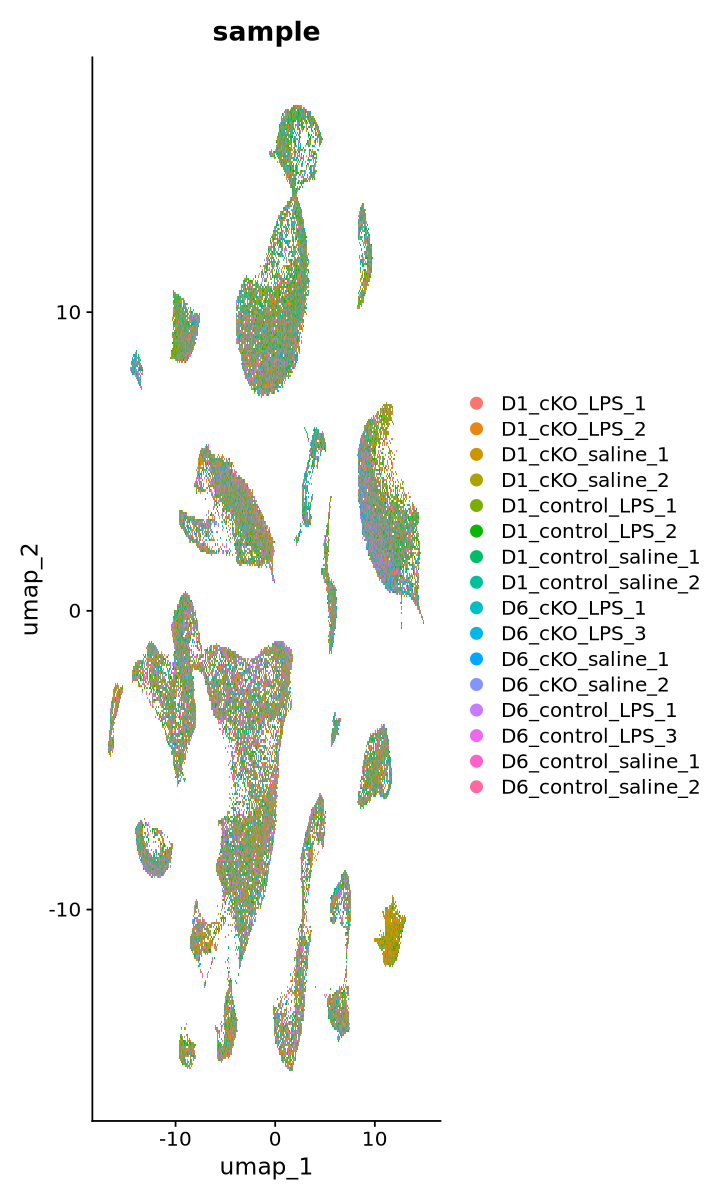

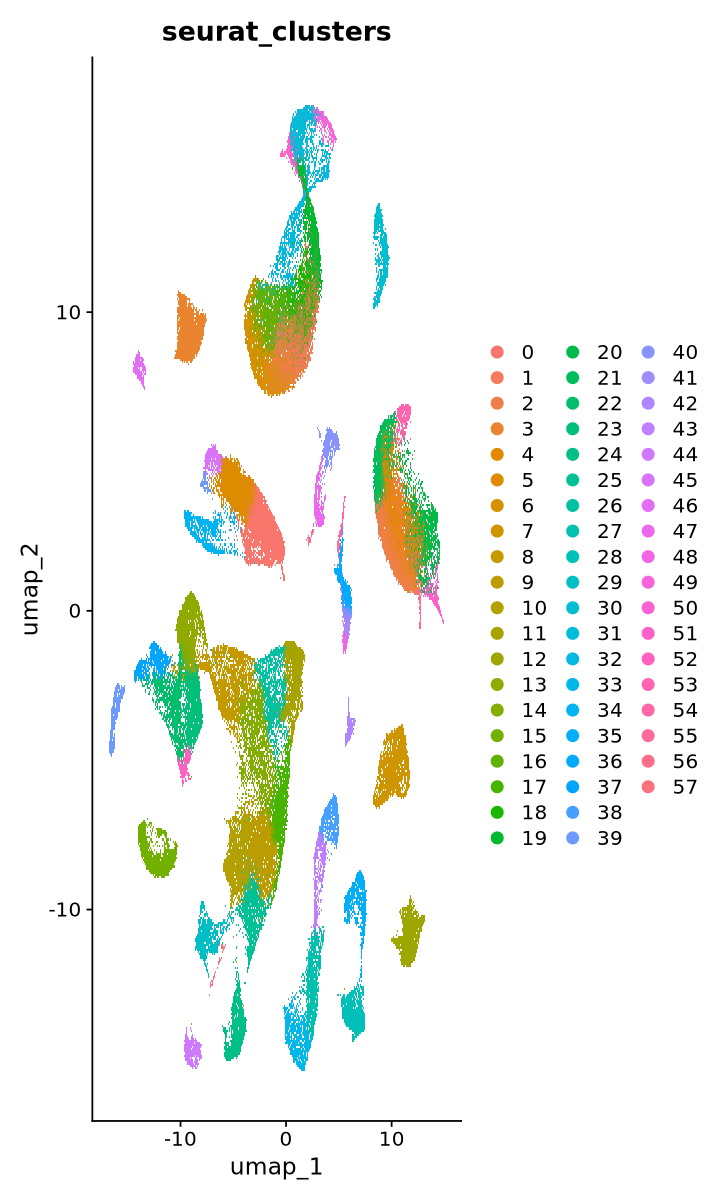

In [73]:
#visualize results after integration
DimPlot(data_final, reduction = "umap", group.by = c("sample"))
DimPlot(data_final, reduction = "umap", group.by = c("seurat_clusters"))

In [74]:
#re-join layers after integration - very important! 
data_final[["RNA"]] <- JoinLayers(data_final[["RNA"]])

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



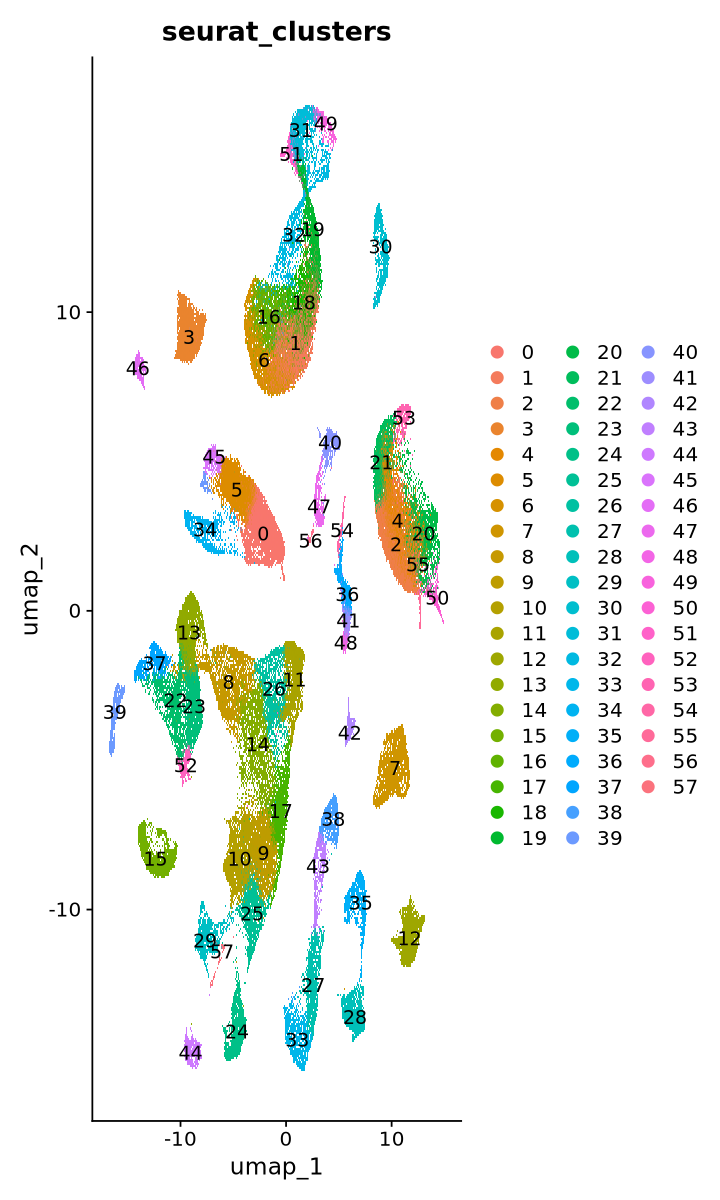

In [75]:
DimPlot(data_final, reduction = "umap", group.by = c("seurat_clusters"), label = TRUE)

In [76]:
head(data_final[[]])

orig.ident    nCount_RNA nFeature_RNA
D1_cKO_LPS_1_AAACCCAGTACAGAAT-1 SeuratProject 5167       2394        
D1_cKO_LPS_1_AAACCCAGTGATAGTA-1 SeuratProject 7121       2714        
D1_cKO_LPS_1_AAACCCAGTTCAAGTC-1 SeuratProject 1388        863        
D1_cKO_LPS_1_AAACCCAGTTTATGCG-1 SeuratProject 2798       1495        
D1_cKO_LPS_1_AAACCCATCACATCAG-1 SeuratProject 8270       3102        
D1_cKO_LPS_1_AAACCCATCACGGGAA-1 SeuratProject  640        522        
                                percent.mt treatment genotype   timepoint
D1_cKO_LPS_1_AAACCCAGTACAGAAT-1 0.69672924 LPS       Elovl7 cKO D1       
D1_cKO_LPS_1_AAACCCAGTGATAGTA-1 0.00000000 LPS       Elovl7 cKO D1       
D1_cKO_LPS_1_AAACCCAGTTCAAGTC-1 0.07204611 LPS       Elovl7 cKO D1       
D1_cKO_LPS_1_AAACCCAGTTTATGCG-1 1.25089350 LPS       Elovl7 cKO D1       
D1_cKO_LPS_1_AAACCCATCACATCAG-1 0.00000000 LPS       Elovl7 cKO D1       
D1_cKO_LPS_1_AAACCCATCACGGGAA-1 0.00000000 LPS       Elovl7 cKO D1       
                                group      sample       nCount_SCT nFeature_SCT
D1_cKO_LPS_1_AAACCCAGTACAGAAT-1 D1_cKO_LPS D1_cKO_LPS_1 5251       2393        
D1_cKO_LPS_1_AAACCCAGTGATAGTA-1 D1_cKO_LPS D1_cKO_LPS_1 6068       2714        
D1_cKO_LPS_1_AAACCCAGTTCAAGTC-1 D1_cKO_LPS D1_cKO_LPS_1 4235       1315        
D1_cKO_LPS_1_AAACCCAGTTTATGCG-1 D1_cKO_LPS D1_cKO_LPS_1 4641       1551        
D1_cKO_LPS_1_AAACCCATCACATCAG-1 D1_cKO_LPS D1_cKO_LPS_1 6269       3090        
D1_cKO_LPS_1_AAACCCATCACGGGAA-1 D1_cKO_LPS D1_cKO_LPS_1 3664       1451        
                                SCT_snn_res.2 seurat_clusters celltype 
D1_cKO_LPS_1_AAACCCAGTACAGAAT-1 32            32              astrocyte
D1_cKO_LPS_1_AAACCCAGTGATAGTA-1 0             0               ex.neuron
D1_cKO_LPS_1_AAACCCAGTTCAAGTC-1 19            19              astrocyte
D1_cKO_LPS_1_AAACCCAGTTTATGCG-1 49            49              astrocyte
D1_cKO_LPS_1_AAACCCATCACATCAG-1 35            35              in.neuron
D1_cKO_LPS_1_AAACCCATCACGGGAA-1 40            40              fibro.1

In [77]:
data_final

An object of class Seurat 
57572 features across 144255 samples within 2 assays 
Active assay: SCT (25287 features, 3000 variable features)
 3 layers present: counts, data, scale.data
 1 other assay present: RNA
 3 dimensional reductions calculated: pca, umap, integrated.dr

In [78]:
#determine final cell-type annotations

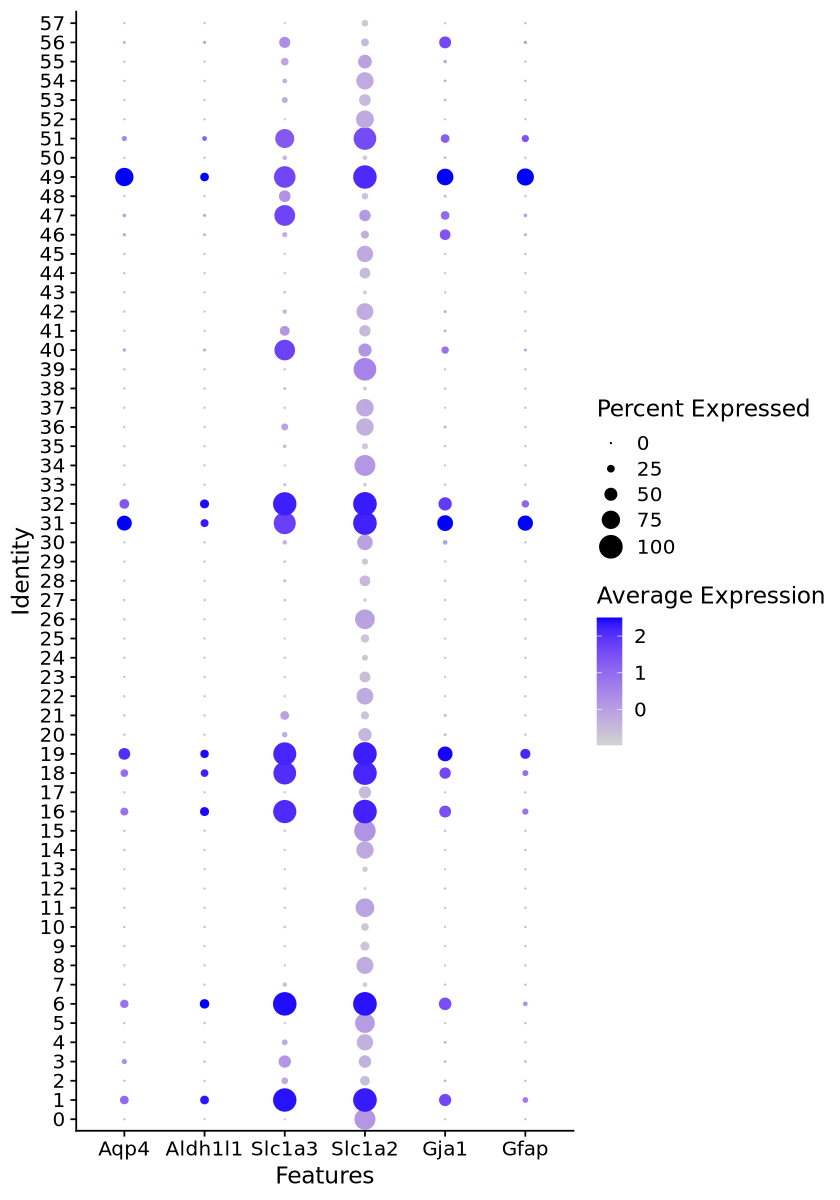

In [79]:
#astrocytes
options(repr.plot.width = 7, repr.plot.height = 10)
DotPlot(data_final, features = c("Aqp4",
"Aldh1l1",                           
"Slc1a3",
"Slc1a2",
"Gja1",
"Gfap"
))

In [90]:
#astrocytes: 1, 6, 16, 18,19,31,32,49,51

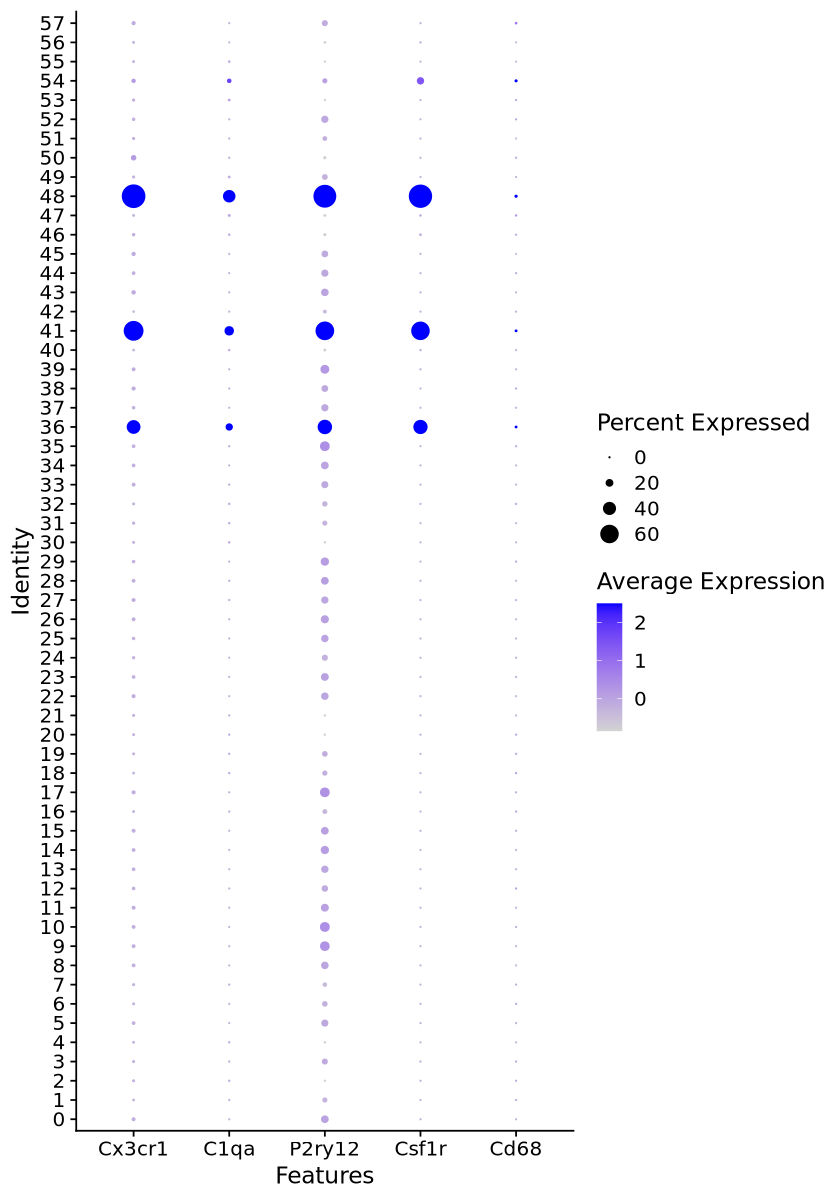

In [80]:
#microglia
options(repr.plot.width = 7, repr.plot.height = 10)
DotPlot(data_final, features = c("Cx3cr1",
"C1qa",
"P2ry12",
"Csf1r",
"Cd68"
))

In [92]:
#microglia: 36,41,48
#potential doublet: 54

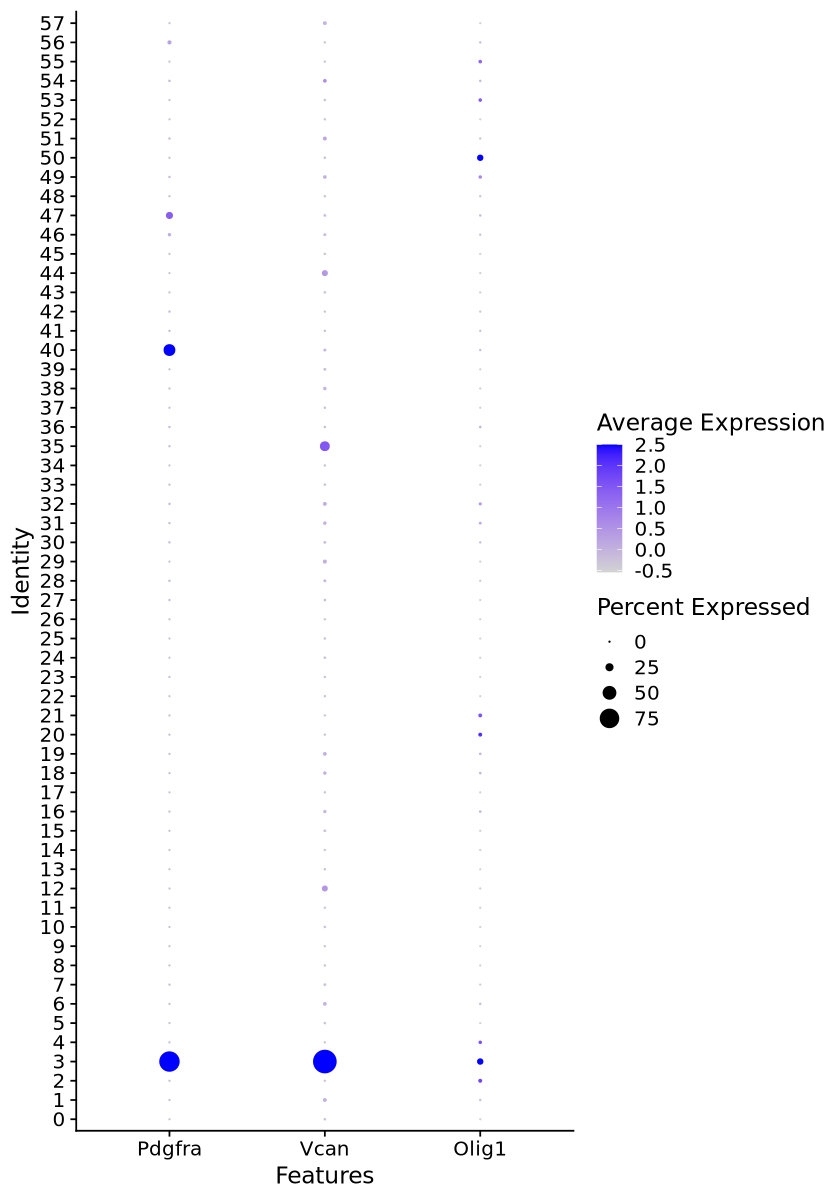

In [81]:
#OPCs
options(repr.plot.width = 7, repr.plot.height = 10)
DotPlot(data_final, features = c("Pdgfra",
"Vcan",
"Olig1"
))

In [93]:
#OPCs: 3

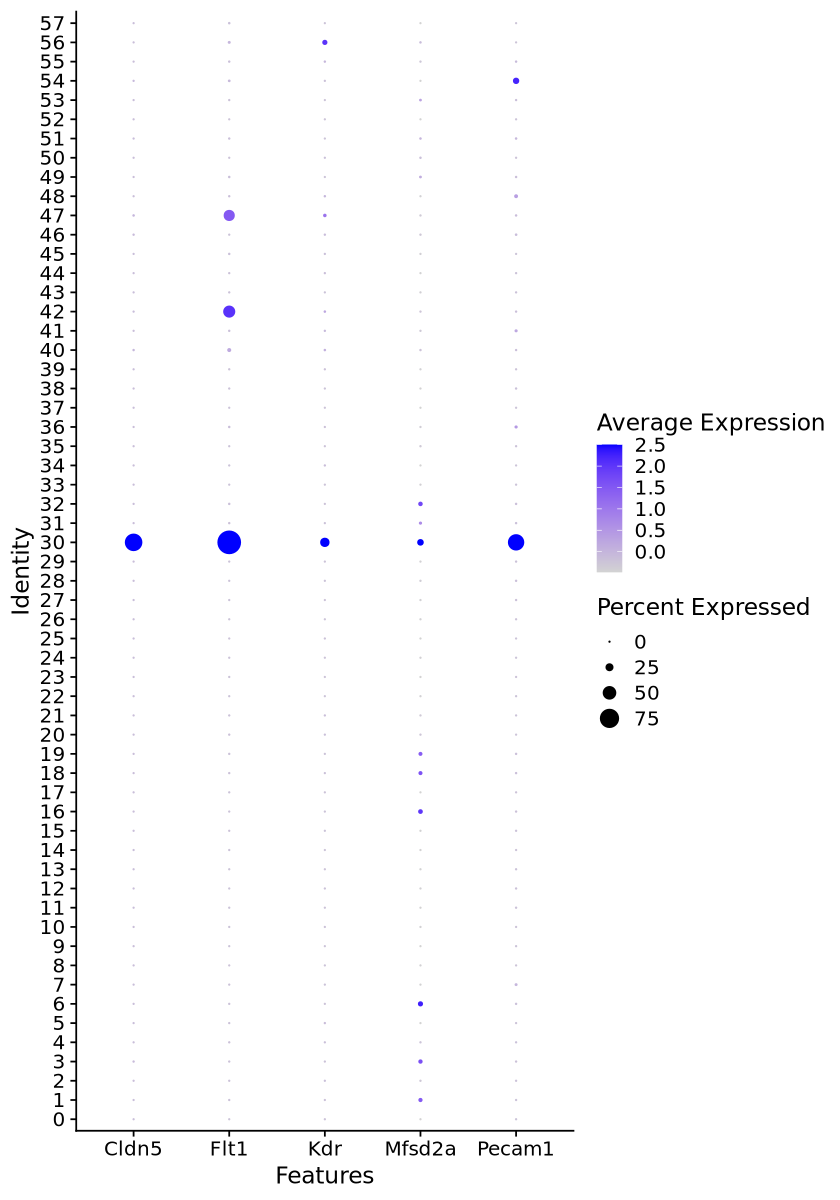

In [82]:
#endothelial cells
options(repr.plot.width = 7, repr.plot.height = 10)
DotPlot(data_final, features = c("Cldn5",
"Flt1",
"Kdr",
"Mfsd2a",
"Pecam1"
))

In [ ]:
#endothelial: 30

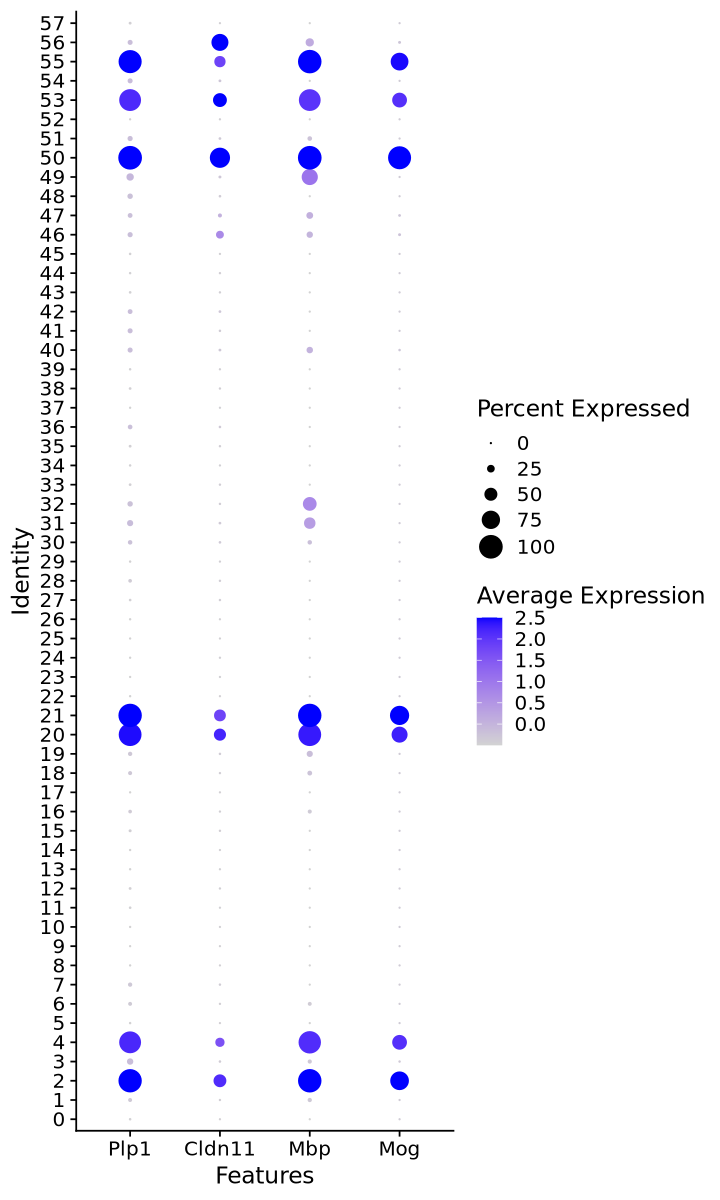

In [83]:
#oligodendrocytes
options(repr.plot.width = 6, repr.plot.height = 10)
DotPlot(data_final, features = c("Plp1", "Cldn11", "Mbp", "Mog")
)

In [94]:
#oligodendrocytes:2,4,20,21,50,53,55

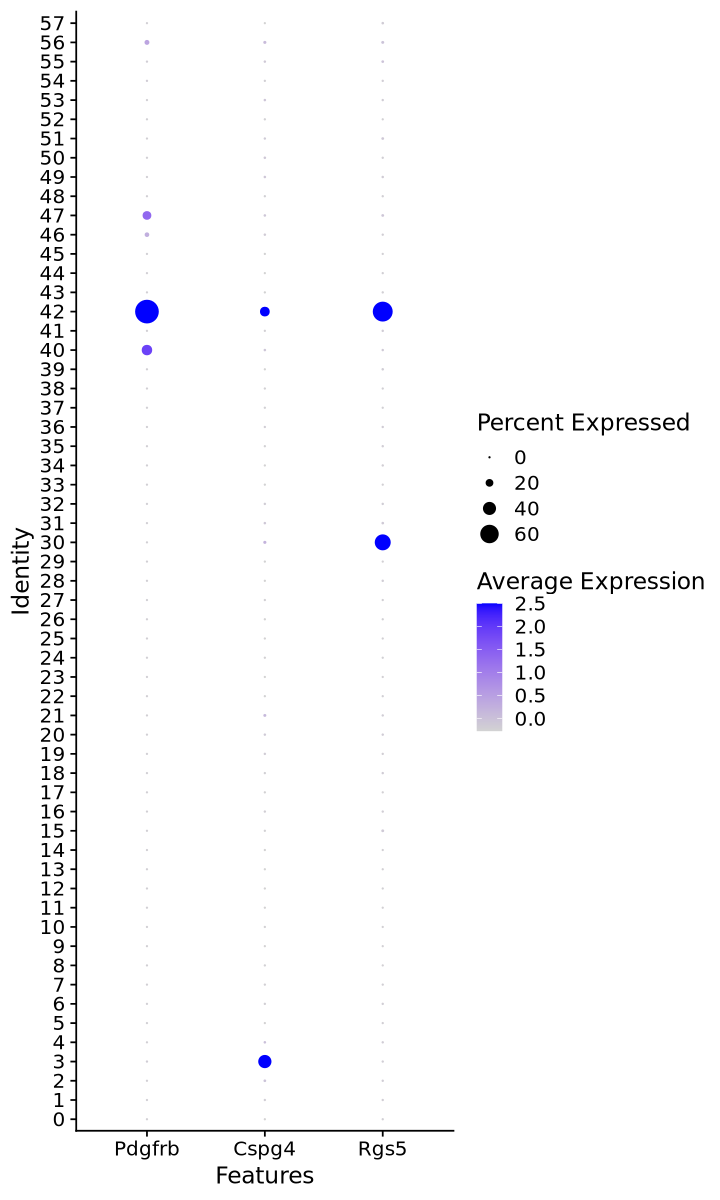

In [84]:
#pericytes and smcs - mural
options(repr.plot.width = 6, repr.plot.height = 10)
DotPlot(data_final, features = c("Pdgfrb", "Cspg4", "Rgs5")
)

In [95]:
#mural: 42

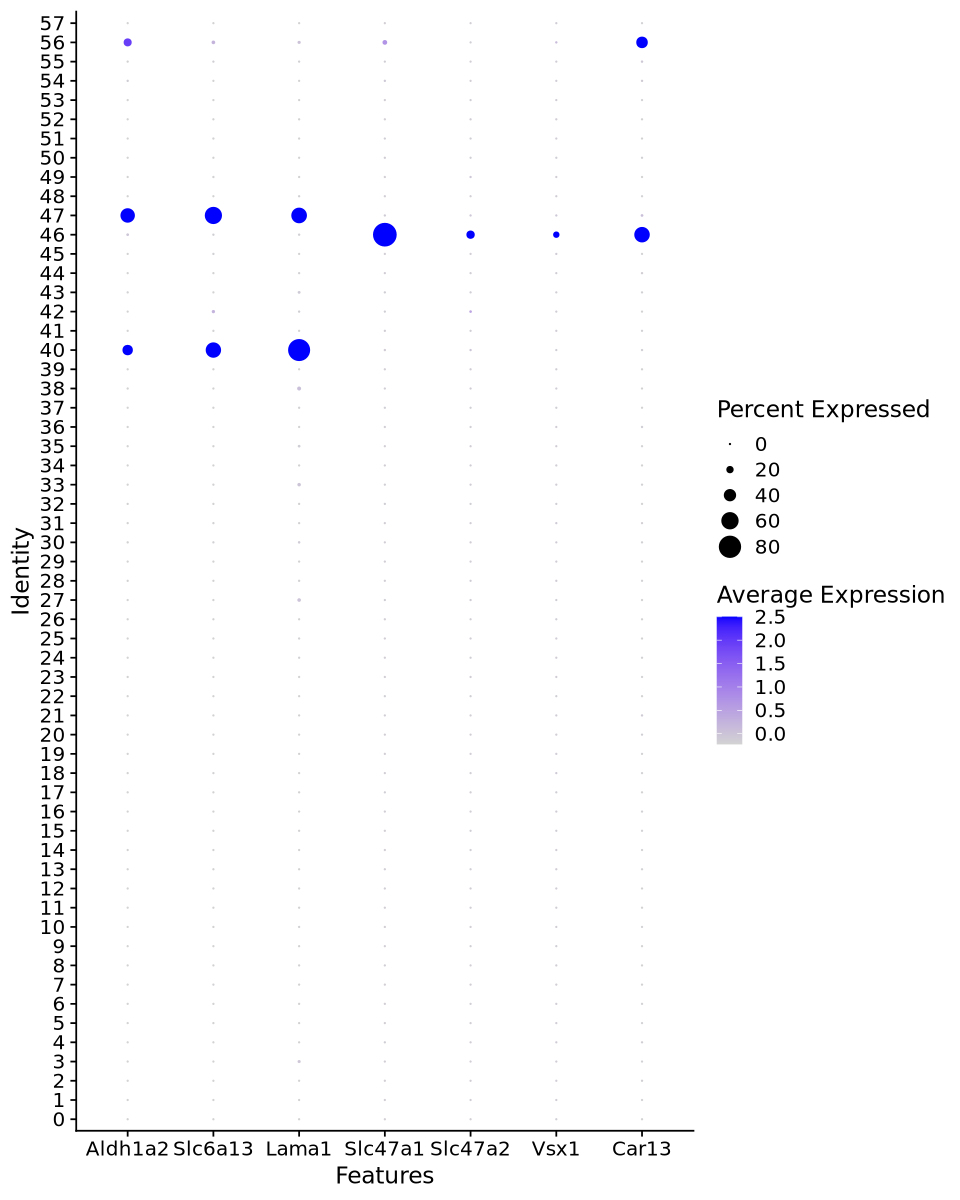

In [85]:
#Fibroblasts
options(repr.plot.width = 8, repr.plot.height = 10)
DotPlot(data_final, features = c("Aldh1a2", "Slc6a13", "Lama1", "Slc47a1", "Slc47a2", "Vsx1", "Car13")
)

In [96]:
#fibro1: 40, 47
#fibro2: 46
#doublet: 56

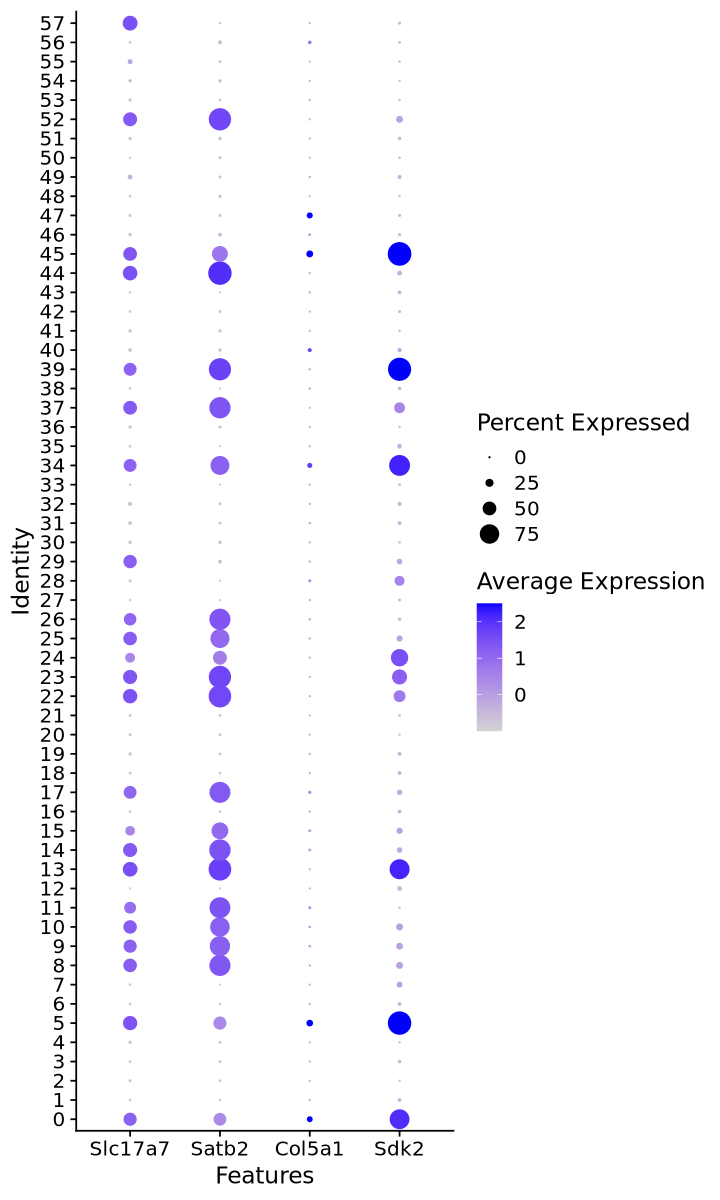

In [86]:
#excitatory neurons
options(repr.plot.width = 6, repr.plot.height = 10)
DotPlot(data_final, features = c("Slc17a7", "Satb2", "Col5a1", "Sdk2")
)

In [97]:
#ex.neuron: 0, 5, 8,9,10,11,13,14,15,17,22,23,24,25,26,29,34,37,39,44,45,52,57

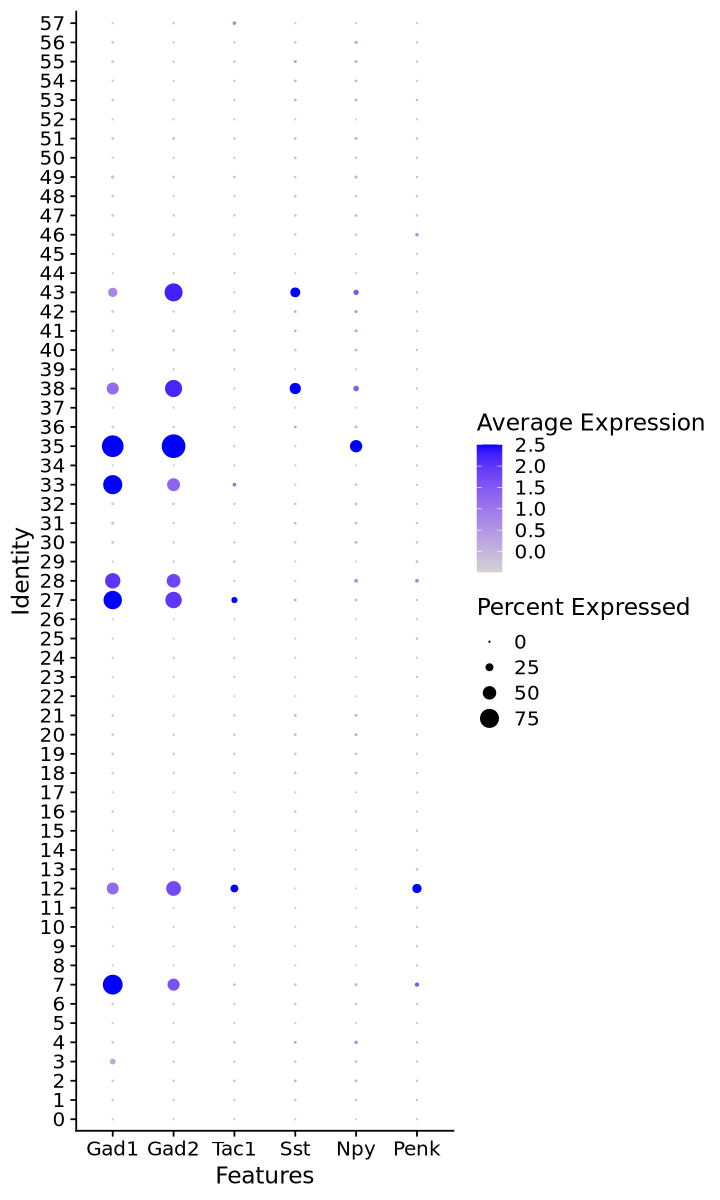

In [87]:
#inhibitory neurons
options(repr.plot.width = 6, repr.plot.height = 10)
DotPlot(data_final, features = c("Gad1", "Gad2", "Tac1", "Sst", "Npy", "Penk")
)

In [98]:
#in.neuron:7,12,27,28,33,35,38,43

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



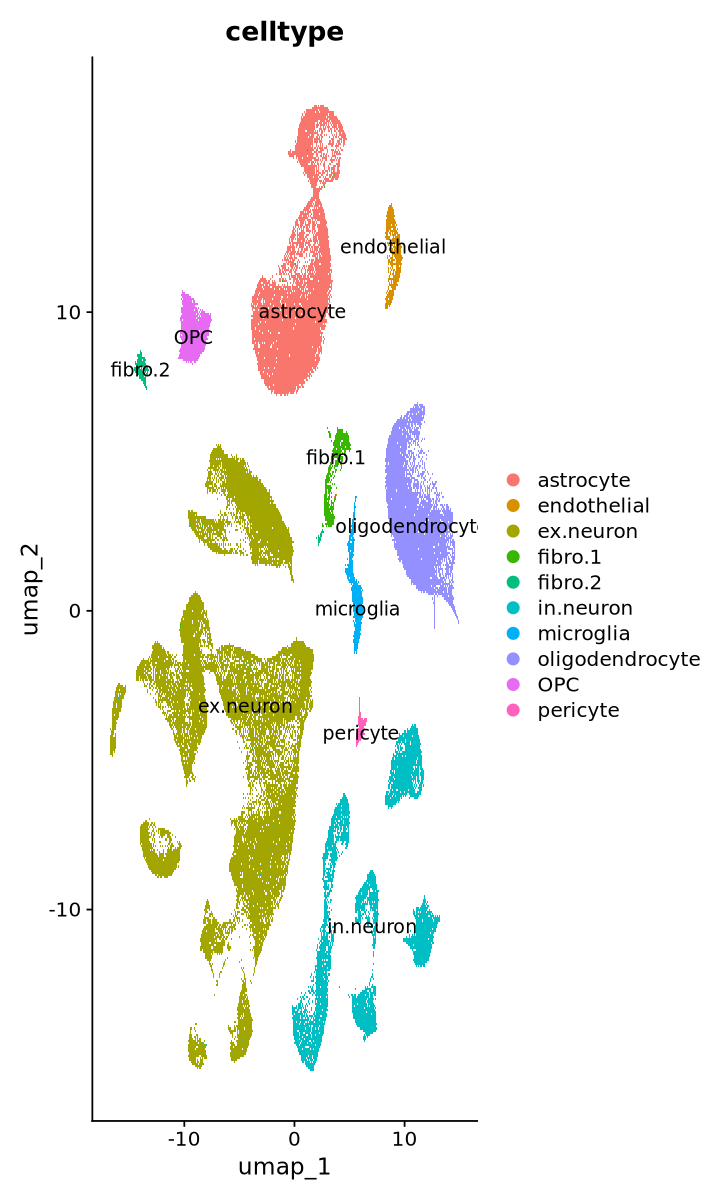

In [88]:
DimPlot(data_final, reduction = "umap", group.by = c("celltype"), label = TRUE)

In [89]:
data_final$celltype <- NULL
head(data_final[[]])

orig.ident    nCount_RNA nFeature_RNA
D1_cKO_LPS_1_AAACCCAGTACAGAAT-1 SeuratProject 5167       2394        
D1_cKO_LPS_1_AAACCCAGTGATAGTA-1 SeuratProject 7121       2714        
D1_cKO_LPS_1_AAACCCAGTTCAAGTC-1 SeuratProject 1388        863        
D1_cKO_LPS_1_AAACCCAGTTTATGCG-1 SeuratProject 2798       1495        
D1_cKO_LPS_1_AAACCCATCACATCAG-1 SeuratProject 8270       3102        
D1_cKO_LPS_1_AAACCCATCACGGGAA-1 SeuratProject  640        522        
                                percent.mt treatment genotype   timepoint
D1_cKO_LPS_1_AAACCCAGTACAGAAT-1 0.69672924 LPS       Elovl7 cKO D1       
D1_cKO_LPS_1_AAACCCAGTGATAGTA-1 0.00000000 LPS       Elovl7 cKO D1       
D1_cKO_LPS_1_AAACCCAGTTCAAGTC-1 0.07204611 LPS       Elovl7 cKO D1       
D1_cKO_LPS_1_AAACCCAGTTTATGCG-1 1.25089350 LPS       Elovl7 cKO D1       
D1_cKO_LPS_1_AAACCCATCACATCAG-1 0.00000000 LPS       Elovl7 cKO D1       
D1_cKO_LPS_1_AAACCCATCACGGGAA-1 0.00000000 LPS       Elovl7 cKO D1       
                                group      sample       nCount_SCT nFeature_SCT
D1_cKO_LPS_1_AAACCCAGTACAGAAT-1 D1_cKO_LPS D1_cKO_LPS_1 5251       2393        
D1_cKO_LPS_1_AAACCCAGTGATAGTA-1 D1_cKO_LPS D1_cKO_LPS_1 6068       2714        
D1_cKO_LPS_1_AAACCCAGTTCAAGTC-1 D1_cKO_LPS D1_cKO_LPS_1 4235       1315        
D1_cKO_LPS_1_AAACCCAGTTTATGCG-1 D1_cKO_LPS D1_cKO_LPS_1 4641       1551        
D1_cKO_LPS_1_AAACCCATCACATCAG-1 D1_cKO_LPS D1_cKO_LPS_1 6269       3090        
D1_cKO_LPS_1_AAACCCATCACGGGAA-1 D1_cKO_LPS D1_cKO_LPS_1 3664       1451        
                                SCT_snn_res.2 seurat_clusters
D1_cKO_LPS_1_AAACCCAGTACAGAAT-1 32            32             
D1_cKO_LPS_1_AAACCCAGTGATAGTA-1 0             0              
D1_cKO_LPS_1_AAACCCAGTTCAAGTC-1 19            19             
D1_cKO_LPS_1_AAACCCAGTTTATGCG-1 49            49             
D1_cKO_LPS_1_AAACCCATCACATCAG-1 35            35             
D1_cKO_LPS_1_AAACCCATCACGGGAA-1 40            40

In [106]:
#astrocytes: 1, 6, 16, 18,19,31,32,49,51
#microglia: 36,41,48 #potential doublet: 54
#OPCs: 3
#endothelial: 30
#oligodendrocytes:2,4,20,21,50,53,55
#mural: 42
#fibro1: 40, 47
#fibro2: 46
#doublet: 56
#ex.neuron: 0, 5, 8,9,10,11,13,14,15,17,22,23,24,25,26,29,34,37,39,44,45,52,57
#in.neuron:7,12,27,28,33,35,38,43

In [99]:
#add cell annotations - these will be helpful for further subsetting and cleaning
data_final$celltype <- case_when( data_final$seurat_clusters == 0 ~ "ex.neuron", 
                                  data_final$seurat_clusters == 1 ~ "astrocyte",
                                  data_final$seurat_clusters == 2 ~ "oligodendrocyte",
                                  data_final$seurat_clusters == 3 ~ "OPC",
                                  data_final$seurat_clusters == 4 ~ "oligodendrocyte",
                                 data_final$seurat_clusters == 5 ~ "ex.neuron",
                                 data_final$seurat_clusters == 6 ~ "astrocyte",
                                 data_final$seurat_clusters == 7 ~ "in.neuron",
                                 data_final$seurat_clusters == 8 ~ "ex.neuron",
                                 data_final$seurat_clusters == 9 ~ "ex.neuron",
                                 data_final$seurat_clusters == 10 ~ "ex.neuron",
                                 data_final$seurat_clusters == 11 ~ "ex.neuron",
                                 data_final$seurat_clusters == 12 ~ "in.neuron",
                                 data_final$seurat_clusters == 13 ~ "ex.neuron",
                                 data_final$seurat_clusters == 14 ~ "ex.neuron",
                                 data_final$seurat_clusters == 15 ~ "ex.neuron",
                                data_final$seurat_clusters == 16 ~ "astrocyte", 
                                  data_final$seurat_clusters == 17 ~ "ex.neuron",
                                  data_final$seurat_clusters == 18 ~ "astrocyte",
                                  data_final$seurat_clusters == 19 ~ "astrocyte",
                                  data_final$seurat_clusters == 20 ~ "oligodendrocyte",
                                 data_final$seurat_clusters == 21 ~ "oligodendrocyte",
                                 data_final$seurat_clusters == 22 ~ "ex.neuron",
                                 data_final$seurat_clusters == 23 ~ "ex.neuron",
                                 data_final$seurat_clusters == 24 ~ "ex.neuron",
                                 data_final$seurat_clusters == 25 ~ "ex.neuron",
                                 data_final$seurat_clusters == 26 ~ "ex.neuron",
                                 data_final$seurat_clusters == 27 ~ "in.neuron",
                                 data_final$seurat_clusters == 28 ~ "in.neuron",
                                 data_final$seurat_clusters == 29 ~ "ex.neuron",
                                 data_final$seurat_clusters == 30 ~ "endothelial",
                                 data_final$seurat_clusters == 31 ~ "astrocyte",
                                data_final$seurat_clusters == 32 ~ "astrocyte", 
                                  data_final$seurat_clusters == 33 ~ "in.neuron",
                                  data_final$seurat_clusters == 34 ~ "ex.neuron",
                                  data_final$seurat_clusters == 35 ~ "in.neuron",
                                  data_final$seurat_clusters == 36 ~ "microglia",
                                 data_final$seurat_clusters == 37 ~ "ex.neuron",
                                 data_final$seurat_clusters == 38 ~ "in.neuron",
                                 data_final$seurat_clusters == 39 ~ "ex.neuron",
                                 data_final$seurat_clusters == 40 ~ "fibro.1",
                                 data_final$seurat_clusters == 41 ~ "microglia",
                                 data_final$seurat_clusters == 42 ~ "mural",
                                 data_final$seurat_clusters == 43 ~ "in.neuron",
                                 data_final$seurat_clusters == 44 ~ "ex.neuron",
                                 data_final$seurat_clusters == 45 ~ "ex.neuron",
                                 data_final$seurat_clusters == 46 ~ "fibro.2",
                                 data_final$seurat_clusters == 47 ~ "fibro.1",
                                data_final$seurat_clusters == 48 ~ "microglia",
                                data_final$seurat_clusters == 49 ~ "astrocyte",
                                data_final$seurat_clusters == 50 ~ "oligodendrocyte",
                                data_final$seurat_clusters == 51 ~ "astrocyte",
                                data_final$seurat_clusters == 52 ~ "ex.neuron",
                                data_final$seurat_clusters == 53 ~ "oligodendrocyte",
                                data_final$seurat_clusters == 54 ~ "microglia",
                                data_final$seurat_clusters == 55 ~ "oligodendrocyte",
                                data_final$seurat_clusters == 56 ~ "doublet",
                                data_final$seurat_clusters == 57 ~ "ex.neuron")

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



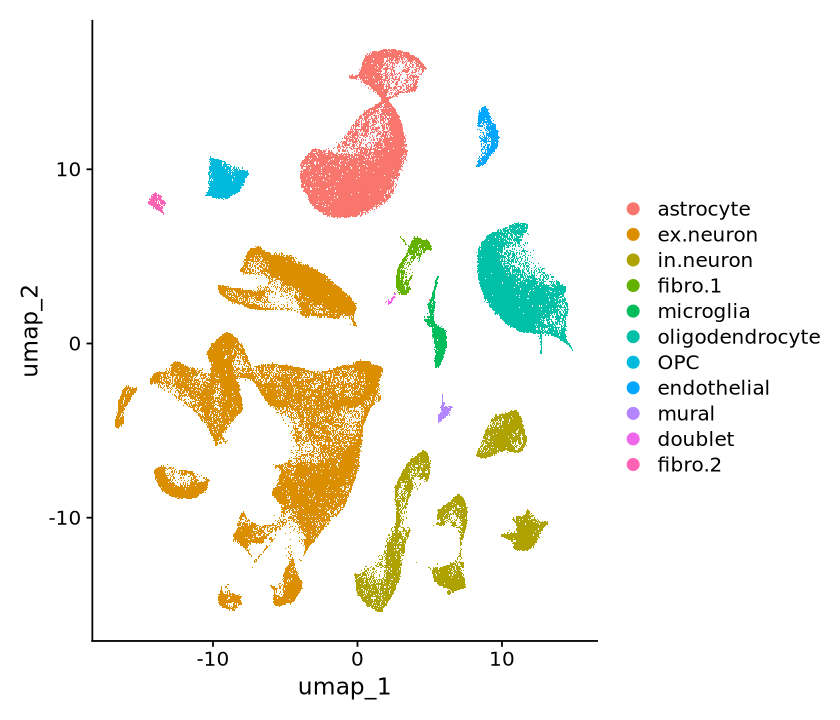

In [100]:
Idents(data_final) <- "celltype"
options(repr.plot.width = 7, repr.plot.height = 6)
DimPlot(data_final, label = FALSE)

In [101]:
data_final1 <- subset(data_final, idents = c("doublet"), invert = TRUE)
data_final1
head(data_final1[[]])

An object of class Seurat 
57572 features across 144089 samples within 2 assays 
Active assay: SCT (25287 features, 3000 variable features)
 3 layers present: counts, data, scale.data
 1 other assay present: RNA
 3 dimensional reductions calculated: pca, umap, integrated.dr

orig.ident    nCount_RNA nFeature_RNA
D1_cKO_LPS_1_AAACCCAGTACAGAAT-1 SeuratProject 5167       2394        
D1_cKO_LPS_1_AAACCCAGTGATAGTA-1 SeuratProject 7121       2714        
D1_cKO_LPS_1_AAACCCAGTTCAAGTC-1 SeuratProject 1388        863        
D1_cKO_LPS_1_AAACCCAGTTTATGCG-1 SeuratProject 2798       1495        
D1_cKO_LPS_1_AAACCCATCACATCAG-1 SeuratProject 8270       3102        
D1_cKO_LPS_1_AAACCCATCACGGGAA-1 SeuratProject  640        522        
                                percent.mt treatment genotype   timepoint
D1_cKO_LPS_1_AAACCCAGTACAGAAT-1 0.69672924 LPS       Elovl7 cKO D1       
D1_cKO_LPS_1_AAACCCAGTGATAGTA-1 0.00000000 LPS       Elovl7 cKO D1       
D1_cKO_LPS_1_AAACCCAGTTCAAGTC-1 0.07204611 LPS       Elovl7 cKO D1       
D1_cKO_LPS_1_AAACCCAGTTTATGCG-1 1.25089350 LPS       Elovl7 cKO D1       
D1_cKO_LPS_1_AAACCCATCACATCAG-1 0.00000000 LPS       Elovl7 cKO D1       
D1_cKO_LPS_1_AAACCCATCACGGGAA-1 0.00000000 LPS       Elovl7 cKO D1       
                                group      sample       nCount_SCT nFeature_SCT
D1_cKO_LPS_1_AAACCCAGTACAGAAT-1 D1_cKO_LPS D1_cKO_LPS_1 5251       2393        
D1_cKO_LPS_1_AAACCCAGTGATAGTA-1 D1_cKO_LPS D1_cKO_LPS_1 6068       2714        
D1_cKO_LPS_1_AAACCCAGTTCAAGTC-1 D1_cKO_LPS D1_cKO_LPS_1 4235       1315        
D1_cKO_LPS_1_AAACCCAGTTTATGCG-1 D1_cKO_LPS D1_cKO_LPS_1 4641       1551        
D1_cKO_LPS_1_AAACCCATCACATCAG-1 D1_cKO_LPS D1_cKO_LPS_1 6269       3090        
D1_cKO_LPS_1_AAACCCATCACGGGAA-1 D1_cKO_LPS D1_cKO_LPS_1 3664       1451        
                                SCT_snn_res.2 seurat_clusters celltype 
D1_cKO_LPS_1_AAACCCAGTACAGAAT-1 32            32              astrocyte
D1_cKO_LPS_1_AAACCCAGTGATAGTA-1 0             0               ex.neuron
D1_cKO_LPS_1_AAACCCAGTTCAAGTC-1 19            19              astrocyte
D1_cKO_LPS_1_AAACCCAGTTTATGCG-1 49            49              astrocyte
D1_cKO_LPS_1_AAACCCATCACATCAG-1 35            35              in.neuron
D1_cKO_LPS_1_AAACCCATCACGGGAA-1 40            40              fibro.1

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



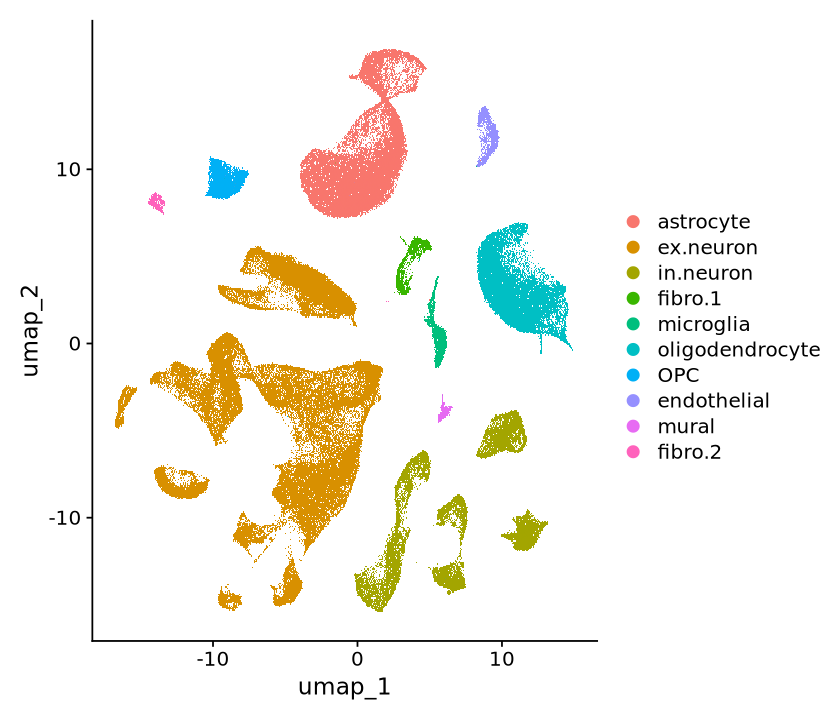

In [102]:
Idents(data_final1) <- "celltype"
options(repr.plot.width = 7, repr.plot.height = 6)
DimPlot(data_final1, label = FALSE)

In [103]:
#re-order celltypes
levels(data_final1) <- c("astrocyte", 
                        "oligodendrocyte",
                        "OPC", 
                        "microglia",
                        "endothelial", 
                        "mural",  
                        "ex.neuron", 
                        "in.neuron", 
                        "fibro.1", 
                        "fibro.2")

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



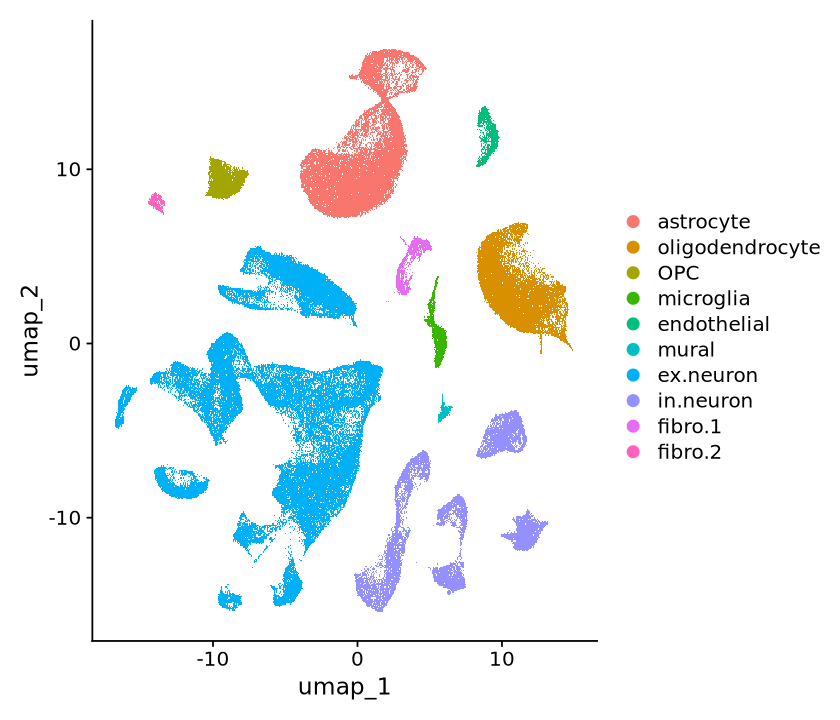

In [104]:
options(repr.plot.width = 7, repr.plot.height = 6)
DimPlot(data_final1, label = FALSE)

In [105]:
#how many cells are in each cluster?
table(Idents(data_final1))


      astrocyte oligodendrocyte             OPC       microglia     endothelial 
          25867           18762            5507            3931            2058 
          mural       ex.neuron       in.neuron         fibro.1         fibro.2 
           1150           64649           19056            2163             946 

In [107]:
# What proportion of cells are in each cluster?
prop.table(table(Idents(data_final1)))


      astrocyte oligodendrocyte             OPC       microglia     endothelial 
    0.179520990     0.130211189     0.038219434     0.027281749     0.014282839 
          mural       ex.neuron       in.neuron         fibro.1         fibro.2 
    0.007981178     0.448674083     0.132251595     0.015011555     0.006565387 

In [108]:
# How many cells are in each sample?
table(data_clean$sample)


       D1_cKO_LPS_1        D1_cKO_LPS_2     D1_cKO_saline_1     D1_cKO_saline_2 
               9351               13047               11761               12105 
   D1_control_LPS_1    D1_control_LPS_2 D1_control_saline_1 D1_control_saline_2 
              10840               13137                9843               14899 
       D6_cKO_LPS_1        D6_cKO_LPS_3     D6_cKO_saline_1     D6_cKO_saline_2 
               3294                4985                5261                6885 
   D6_control_LPS_1    D6_control_LPS_3 D6_control_saline_1 D6_control_saline_2 
               6869                8459                3952                9567 

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



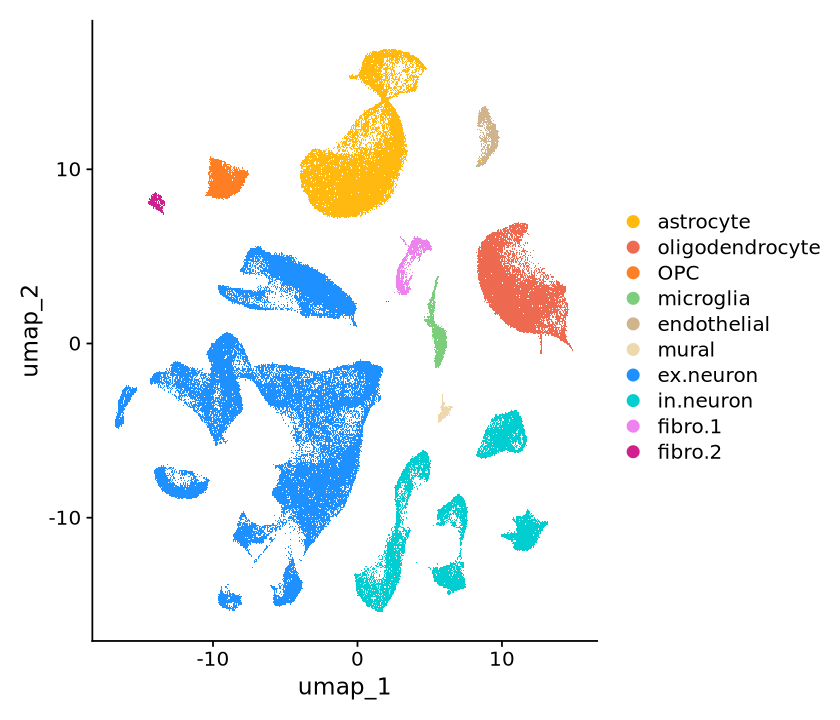

In [109]:
options(repr.plot.width = 7, repr.plot.height = 6)
DimPlot(data_final1, label = FALSE, cols = c('astrocyte' = 'darkgoldenrod1', 'oligodendrocyte' = 'coral2', 'microglia' = 'palegreen3', 'OPC' = 'chocolate1', 
                                           'endothelial' = 'tan', 'mural' = 'wheat2', 'ex.neuron' = 'dodgerblue', 'in.neuron' = 'darkturquoise',
                                           'fibro.1' = 'violet', 'fibro.2' = 'violetred'))

In [110]:
saveRDS(data_final1, "FAT7_final_SoupX_scT_integrate_celltype_annotated_05282024.rds")

In [113]:
#find markers for every cluster compared to all remaining cells, report only positive ones
data.markers <- FindAllMarkers(data_final1, only.pos = TRUE, recorrect_umi = FALSE)

Calculating cluster astrocyte

Calculating cluster oligodendrocyte

Calculating cluster OPC

Calculating cluster microglia

Calculating cluster endothelial

Calculating cluster mural

Calculating cluster ex.neuron

Calculating cluster in.neuron

Calculating cluster fibro.1

Calculating cluster fibro.2



In [114]:
data.markers <- data.markers %>%
                group_by(cluster) %>%
                dplyr::filter(avg_log2FC > 1)

In [115]:
head(data.markers)

p_val avg_log2FC pct.1 pct.2 p_val_adj cluster   gene  
1 0     5.519770   0.951 0.065 0         astrocyte Prex2 
2 0     5.016988   0.970 0.091 0         astrocyte Slc1a3
3 0     3.569990   0.960 0.102 0         astrocyte Ptprz1
4 0     4.959578   0.976 0.142 0         astrocyte Gpc5  
5 0     4.334611   0.895 0.070 0         astrocyte Mertk 
6 0     3.518693   0.886 0.067 0         astrocyte Atp1a2

In [116]:
data.markers %>%
    slice_head(n = 10) %>%
    ungroup() -> top10

In [117]:
top10

p_val avg_log2FC pct.1 pct.2 p_val_adj cluster         gene         
1   0     5.519770   0.951 0.065 0         astrocyte       Prex2        
2   0     5.016988   0.970 0.091 0         astrocyte       Slc1a3       
3   0     3.569990   0.960 0.102 0         astrocyte       Ptprz1       
4   0     4.959578   0.976 0.142 0         astrocyte       Gpc5         
5   0     4.334611   0.895 0.070 0         astrocyte       Mertk        
6   0     3.518693   0.886 0.067 0         astrocyte       Atp1a2       
7   0     4.795019   0.879 0.067 0         astrocyte       Plpp3        
8   0     4.993129   0.862 0.059 0         astrocyte       Gm20713      
9   0     5.263402   0.807 0.039 0         astrocyte       Glis3        
10  0     5.593591   0.792 0.031 0         astrocyte       Gli3         
11  0     8.974231   0.941 0.010 0         oligodendrocyte St18         
12  0     6.403152   0.968 0.047 0         oligodendrocyte Mbp          
13  0     6.767810   0.958 0.049 0         oligodendrocyte Plp1         
14  0     8.399824   0.920 0.012 0         oligodendrocyte Prr5l        
15  0     6.050265   0.860 0.042 0         oligodendrocyte Mobp         
16  0     3.794552   0.937 0.140 0         oligodendrocyte Zfp536       
17  0     4.573318   0.933 0.137 0         oligodendrocyte Dock10       
18  0     7.472046   0.803 0.015 0         oligodendrocyte D7Ertd443e   
19  0     5.608626   0.772 0.071 0         oligodendrocyte Rnf220       
20  0     6.363347   0.719 0.019 0         oligodendrocyte Aspa         
21  0     6.774757   0.930 0.033 0         OPC             Vcan         
22  0     3.044282   0.964 0.115 0         OPC             Nxph1        
23  0     2.200685   0.964 0.123 0         OPC             Adarb2       
24  0     7.148271   0.789 0.008 0         OPC             Pdgfra       
25  0     4.578959   0.904 0.125 0         OPC             Gm4876       
26  0     5.663000   0.996 0.218 0         OPC             Lhfpl3       
27  0     3.255946   0.973 0.210 0         OPC             Sox6         
28  0     2.787812   0.986 0.227 0         OPC             Ptprz1       
29  0     1.715019   0.991 0.247 0         OPC             Erbb4        
30  0     1.353014   0.989 0.264 0         OPC             Gpc5         
⋮   ⋮     ⋮          ⋮     ⋮     ⋮         ⋮               ⋮            
71  0      4.015286  0.906 0.246 0         in.neuron       Galntl6      
72  0      5.902160  0.634 0.015 0         in.neuron       Gad1         
73  0      3.093633  0.814 0.200 0         in.neuron       Spock3       
74  0      6.790028  0.582 0.007 0         in.neuron       Gad2         
75  0      3.274581  0.965 0.408 0         in.neuron       Dpp6         
76  0      3.823931  0.617 0.060 0         in.neuron       Kcnip1       
77  0      7.517442  0.552 0.004 0         in.neuron       Dlx6os1      
78  0      2.698821  0.777 0.229 0         in.neuron       Rbms3        
79  0      1.729708  0.866 0.345 0         in.neuron       Epha6        
80  0      3.875575  0.726 0.207 0         in.neuron       Erbb4        
81  0      6.450972  0.943 0.048 0         fibro.1         Cped1        
82  0      7.141124  0.806 0.013 0         fibro.1         Slc6a20a     
83  0      6.270866  0.816 0.028 0         fibro.1         Colec12      
84  0      5.838851  0.798 0.053 0         fibro.1         Adam12       
85  0      7.323904  0.762 0.021 0         fibro.1         Bmp6         
86  0      5.004122  0.852 0.113 0         fibro.1         Slc7a11      
87  0      5.811358  0.799 0.068 0         fibro.1         Ranbp3l      
88  0      3.573464  0.904 0.203 0         fibro.1         Atp1a2       
89  0      4.120605  0.777 0.091 0         fibro.1         9530026P05Rik
90  0      9.081204  0.679 0.005 0         fibro.1         Lama1        
91  0      8.942082  0.997 0.012 0         fibro.2         Bnc2         
92  0      7.488967  0.930 0.014 0         fibro.2         Eya2         
93  0      6.686244  0.981 0.068 0         fibro.2         Fbx

In [118]:
#export cluster markers
write.csv(top10, "top10_annotated_cluster_markers_052824.csv")

In [145]:
pdf("./figures/annotated_UMAP_052824.pdf",
   width = 7,
   height = 6)

options(repr.plot.width = 7, repr.plot.height = 6)
DimPlot(data_final1, label = FALSE, cols = c('astrocyte' = 'darkgoldenrod1', 'oligodendrocyte' = 'coral2', 'microglia' = 'palegreen3', 'OPC' = 'chocolate1', 
                                           'endothelial' = 'tan', 'mural' = 'wheat2', 'ex.neuron' = 'dodgerblue', 'in.neuron' = 'darkturquoise',
                                           'fibro.1' = 'violet', 'fibro.2' = 'violetred'), raster = FALSE) +
xlab("UMAP 1")+
ylab("UMAP 2")
dev.off()

png 
  2

In [143]:
cellmarkers <- c("Aqp4", "Slc1a3", "Aldh1l1",
                 "Plp1", "Mbp", "Mog",
                 "Pdgfra", "Vcan", "Olig1",
                 "Csf1r", "P2ry12", "Runx1",
                 "Flt1", "Lef1", "Slc2a1",
                 "Pdgfrb", "Atp13a5", "Abcc9",
                 "Slc17a7", "Satb2", "Sdk2",
                 "Gad1", "Gad2", "Dlx6os1",
                 "Aldh1a2", "Lama1", "Slc6a13",
                 "Slc47a1", "Slc47a2", "Car13"
)

In [141]:
library(ggplot2)

Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.


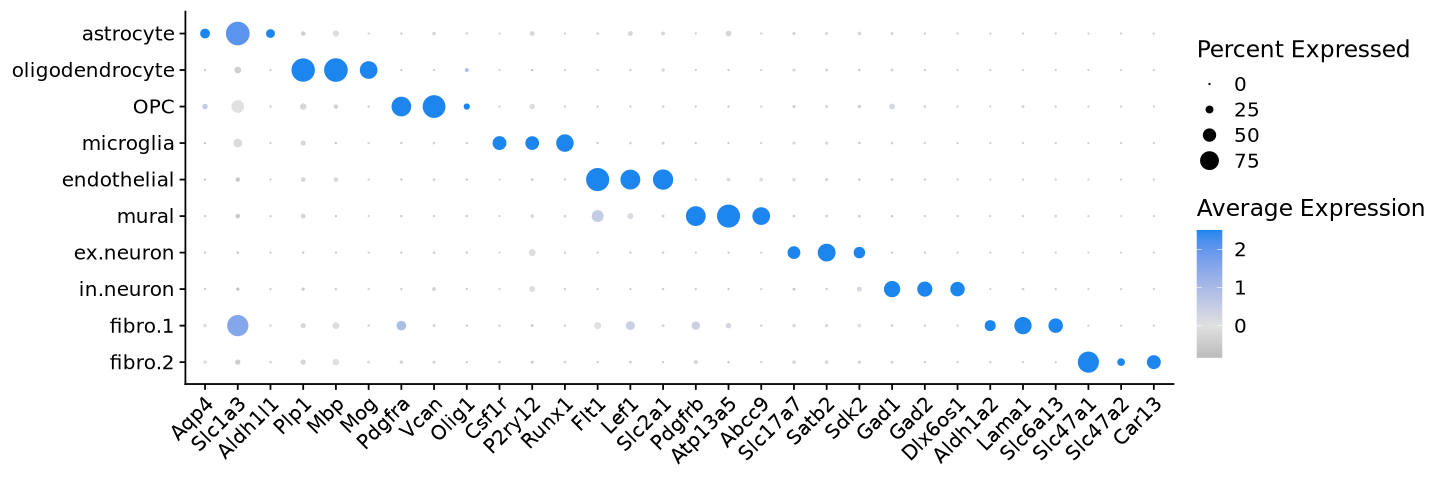

In [147]:
#re-order celltypes
levels(data_final1) <- c("fibro.2","fibro.1","in.neuron","ex.neuron","mural", "endothelial","microglia", "OPC","oligodendrocyte", "astrocyte" )
                      
#DotPlot of cell-type specific markers
options(repr.plot.width = 12, repr.plot.height = 4)
DotPlot(data_final1, features = cellmarkers, col.min = -2.5, col.max = 2.5) +
RotatedAxis() +
scale_colour_gradient2(low="gray47", mid="gray88", high="dodgerblue2") +
xlab(NULL)+
ylab(NULL)

In [148]:
pdf("./figures/DotPlot_celltype_markers_052824.pdf",
   width = 12,
   height = 4)

#DotPlot of cell-type specific markers
options(repr.plot.width = 12, repr.plot.height = 4)
DotPlot(data_final1, features = cellmarkers, col.min = -2.5, col.max = 2.5) +
RotatedAxis() +
scale_colour_gradient2(low="gray47", mid="gray88", high="dodgerblue2") +
xlab(NULL)+
ylab(NULL)

dev.off()

Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.


png 
  2